# Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Tratamento dos Dados, com objetivo de otimizar as etapas posteriores que serão:
- Analisar o Faturamento Total de Cada Loja
- Vendas por Categoria
- Média de Avaliação por Loja
- Produtos Mais e Menos Vendidos
- Frete Médio por Loja

In [2]:
# Adicionando coluna de identificação da loja
loja['loja'] = 'Loja_1'
loja2['loja'] = 'Loja_2'
loja3['loja'] = 'Loja_3'
loja4['loja'] = 'Loja_4'

In [3]:
# Unindo todos os DataFrames em uma única base
df_geral = pd.concat([loja, loja2, loja3, loja4])

In [4]:
# Identificando regiões das vendas de cada loja
regioes_siglas = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'BA': 'Nordeste',
    'SE': 'Nordeste',
    'AL': 'Nordeste',
    'PE': 'Nordeste',
    'PB': 'Nordeste',
    'RN': 'Nordeste',
    'CE': 'Nordeste',
    'PI': 'Nordeste',
    'MA': 'Nordeste',
    'PR': 'Sul',
    'SC': 'Sul',
    'RS': 'Sul',
    'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste',
    'AM': 'Norte',
    'PA': 'Norte',
    'AP': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'RO': 'Norte',
    'AC': 'Norte'
}

In [5]:
# Adicionando coluna de identificação da região da compra
df_geral['Região'] = df_geral['Local da compra'].map(regioes_siglas)

In [6]:
# Adicionando coluna de identificação das datas, separando por Ano, Mês e Dia

# Garantir que a coluna de data está em formato datetime
df_geral['Data da Compra'] = pd.to_datetime(df_geral['Data da Compra'])

# Criar a coluna AnoMes no formato 'YYYY-MM'
df_geral['AnoMes'] = df_geral['Data da Compra'].dt.strftime('%Y-%m')

# Criar coluna com o ano
df_geral['Ano'] = df_geral['Data da Compra'].dt.year

# Criar a coluna Mês por extenso (ex: Janeiro, Fevereiro)
df_geral['Mês_Nome'] = df_geral['Data da Compra'].dt.strftime('%B')

# Criar coluna com o dia
df_geral['Dia'] = df_geral['Data da Compra'].dt.day


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12328\1573805461.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_geral['Data da Compra'] = pd.to_datetime(df_geral['Data da Compra'])


In [7]:
df_geral

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,Região,AnoMes,Ano,Mês_Nome,Dia
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja_1,Sudeste,2021-01,2021,January,16
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja_1,Sudeste,2022-05,2022,May,18
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja_1,Centro-Oeste,2021-03,2021,March,15
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja_1,Sul,2022-05,2022,May,3
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja_1,Sudeste,2020-11,2020,November,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de jantar,moveis,303.60,16.852799,2020-02-12,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja_4,Sudeste,2020-02,2020,February,12
2354,Cadeira de escritório,moveis,456.02,24.812798,2022-05-17,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja_4,Nordeste,2022-05,2022,May,17
2355,Copo térmico,esporte e lazer,48.99,3.139675,2022-05-03,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja_4,Sudeste,2022-05,2022,May,3
2356,Jogo de panelas,utilidades domesticas,202.45,11.062979,2020-06-15,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja_4,Sul,2020-06,2020,June,15


# 1. Análise do faturamento

## Aqui vamos analisar o Faturamento (Total e Loja) por Ano, Mês e Dia

Nosso objetivo é tirar alguns insight em relação ao faturamento como:

    1 - Qual foi o maior faturamento anual, mensal e diário?
    2 - Qual foi o pior faturamento anual, mensal e diário?
    3 - Qual Região mais e menos ajudou no faturamento nas Lojas do Seu João?
    4 - Qual Estado mais e menos ajudou no faturamento nas Lojas do seu João?

    5 - Como foi o faturamento em datas comemorativas e promocionais? Essa pergunta será respondida numa versão futura deste projeto!

In [8]:
# Faturamento total das lojas
faturamento_total = df_geral['Preço'].sum().round(2)

faturamento_total

5871490.79

In [9]:
# Faturamento total das lojas por ano

faturamento_total_por_ano = df_geral.groupby('Ano')['Preço'].sum().reset_index().round(2)

# Renomear a coluna 'Preço' para 'Faturamento'
faturamento_total_por_ano = faturamento_total_por_ano.rename(columns={'Preço': 'Faturamento'})

faturamento_total_por_ano

,Ano,Faturamento
0,2020,1789272.37
1,2021,1898820.98
2,2022,1769933.73
3,2023,413463.71


In [10]:
# Faturamento total das lojas separadamente

faturamento_total_por_loja = df_geral.groupby('loja')['Preço'].sum().reset_index().round(2)

# Renomear a coluna 'Preço' para 'Faturamento'
faturamento_total_por_loja = faturamento_total_por_loja.rename(columns={'Preço': 'Faturamento'})

faturamento_total_por_loja

,loja,Faturamento
0,Loja_1,1534509.12
1,Loja_2,1488459.06
2,Loja_3,1464025.03
3,Loja_4,1384497.58


In [11]:
# Faturamento total das lojas por Região

faturamento_total_por_regiao = df_geral.groupby(['Região'])['Preço'].sum().reset_index().round(2)

# Ordenar o DataFrame pelo maior faturamento por região
faturamento_total_regiao_ordenado = faturamento_total_por_regiao.sort_values(by='Preço', ascending=False)

# Renomear a coluna 'Preço' para 'Faturamento'
faturamento_total_regiao_ordenado = faturamento_total_regiao_ordenado.rename(columns={'Preço': 'Faturamento'})

faturamento_total_regiao_ordenado

,Região,Faturamento
3,Sudeste,3988869.47
4,Sul,869770.63
1,Nordeste,543931.75
0,Centro-Oeste,368908.25
2,Norte,100010.69


In [12]:
# Volume total das lojas por Região

volume_total_por_regiao = df_geral.groupby(['Região'])['Produto'].count().reset_index().round(2)

# Ordenar o DataFrame pelo maior volume de vendas por região
volume_total_regiao_ordenado = volume_total_por_regiao.sort_values(by='Produto', ascending=False)

volume_total_regiao_ordenado

,Região,Produto
3,Sudeste,6428
4,Sul,1353
1,Nordeste,907
0,Centro-Oeste,590
2,Norte,157


In [13]:
# Faturamento total anual por loja
faturamento_anual = df_geral.groupby(['Ano', 'loja'])['Preço'].sum().reset_index().round(2)

# Renomear a coluna 'Preço' para 'Faturamento'
faturamento_anual = faturamento_anual.rename(columns={'Preço': 'Faturamento'})

# Ordenar o DataFrame pelo maior faturamento mensal
faturamento_anual_ordenado = faturamento_anual.sort_values(by='Faturamento', ascending=False)

faturamento_anual_ordenado

,Ano,loja,Faturamento
0,2020,Loja_1,491911.51
6,2021,Loja_3,483938.91
4,2021,Loja_1,482829.91
9,2022,Loja_2,477635.56
5,2021,Loja_2,468288.89
10,2022,Loja_3,467250.70
7,2021,Loja_4,463763.27
3,2020,Loja_4,441129.52
2,2020,Loja_3,428943.09
1,2020,Loja_2,427288.25


In [14]:
# Faturamento total mensal por loja
faturamento_mensal = df_geral.groupby(['Mês_Nome', 'loja'])['Preço'].sum().reset_index().round(2)

# Renomear a coluna 'Preço' para 'Faturamento'
faturamento_mensal = faturamento_mensal.rename(columns={'Preço': 'Faturamento'})

# Ordenar o DataFrame pelo maior faturamento mensal
faturamento_mensal_ordenado = faturamento_mensal.sort_values(by='Faturamento', ascending=False)

faturamento_mensal_ordenado

,Mês_Nome,loja,Faturamento
12,February,Loja_1,183599.50
17,January,Loja_2,168149.22
28,March,Loja_1,164507.46
31,March,Loja_4,154219.67
16,January,Loja_1,151735.91
44,September,Loja_1,149233.98
10,December,Loja_3,148235.80
18,January,Loja_3,146216.21
15,February,Loja_4,141299.57
29,March,Loja_2,141197.02


In [15]:
# Faturamento total dia por loja
faturamento_diario = df_geral.groupby(['Dia', 'loja'])['Preço'].sum().reset_index().round(2)

# Renomear a coluna 'Preço' para 'Faturamento'
faturamento_diario = faturamento_diario.rename(columns={'Preço': 'Faturamento'})

# Ordenar o DataFrame pelo maior faturamento mensal
faturamento_diario_ordenado = faturamento_diario.sort_values(by='Faturamento', ascending=False)

faturamento_diario_ordenado

,Dia,loja,Faturamento
114,29,Loja_3,72567.91
52,14,Loja_1,67209.14
8,3,Loja_1,66943.19
48,13,Loja_1,66053.29
58,15,Loja_3,65690.63
...,...,...,...
122,31,Loja_3,27059.29
7,2,Loja_4,26105.28
123,31,Loja_4,25071.40
121,31,Loja_2,19262.37


### Respostas sobre faturamento analisadas

In [16]:
# 1 - Qual foi o maior faturamento anual, mensal e diário?

melhor_faturamento_anual = df_geral.groupby('Ano')['Preço'].sum()
maior_faturamento_anual = melhor_faturamento_anual.max()
ano_maior_faturamento_anual = melhor_faturamento_anual[melhor_faturamento_anual == maior_faturamento_anual].index[0]

print(f"O melhor desempenho de faturamento anual nas lojas foi no ano de {ano_maior_faturamento_anual}, com um total de R$ {maior_faturamento_anual:.2f}")

melhor_faturamento_mensal = df_geral.groupby('Mês_Nome')['Preço'].sum()
maior_faturamento_mensal = melhor_faturamento_mensal.max()
mes_maior_faturamento_mensal = melhor_faturamento_mensal[melhor_faturamento_mensal == maior_faturamento_mensal].index[0]

print(f"O melhor desempenho de faturamento mensal nas lojas foram nos meses de {mes_maior_faturamento_mensal}, com um total de R$ {maior_faturamento_mensal:.2f}")

melhor_faturamento_diario = df_geral.groupby('Dia')['Preço'].sum()
maior_faturamento_diario = melhor_faturamento_diario.max()
data_maior_faturamento_diario = melhor_faturamento_diario[melhor_faturamento_diario == maior_faturamento_diario].index[0]

print(f"O melhor desempenho de faturamento diário nas lojas foram nos dias {data_maior_faturamento_diario}, com um total de R$ {maior_faturamento_diario:.2f}")

# 2 - Qual foi o pior faturamento anual, mensal e diário?

pior_faturamento_anual = df_geral.groupby('Ano')['Preço'].sum()
menor_faturamento_anual = pior_faturamento_anual.min()
ano_menor_faturamento_anual = pior_faturamento_anual[pior_faturamento_anual == menor_faturamento_anual].index[0]

print(f"O pior desempenho de faturamento anual nas lojas foi no ano de {ano_menor_faturamento_anual}, com um total de R$ {menor_faturamento_anual:.2f}")

pior_faturamento_mensal = df_geral.groupby('Mês_Nome')['Preço'].sum()
menor_faturamento_mensal = pior_faturamento_mensal.min()
mes_menor_faturamento_mensal = pior_faturamento_mensal[pior_faturamento_mensal == menor_faturamento_mensal].index[0]

print(f"O pior desempenho de faturamento mensal nas lojas foram nos meses de {mes_menor_faturamento_mensal}, com um total de R$ {menor_faturamento_mensal:.2f}")

pior_faturamento_diario = df_geral.groupby('Dia')['Preço'].sum()
menor_faturamento_diario = pior_faturamento_diario.min()
data_menor_faturamento_diario = pior_faturamento_diario[pior_faturamento_diario == maior_faturamento_diario].index[0]

print(f"O pior desempenho de faturamento diário nas lojas foram nos dias {data_menor_faturamento_diario}, com um total de R$ {menor_faturamento_diario:.2f}")

# 3 - Qual Região mais e menos ajudou no faturamento nas Lojas do Seu João?

melhor_faturamento_regiao = df_geral.groupby('Região')['Preço'].sum()
maior_faturamento_regiao = melhor_faturamento_regiao.max()
regiao_maior_faturamento_regiao = melhor_faturamento_regiao[melhor_faturamento_regiao == maior_faturamento_regiao].index[0]

print(f"O melhor desempenho de faturamento nas lojas foi na Região {regiao_maior_faturamento_regiao}, com um total de R$ {maior_faturamento_regiao: }")

pior_faturamento_regiao = df_geral.groupby('Região')['Preço'].sum()
menor_faturamento_regiao = pior_faturamento_regiao.min()
regiao_menor_faturamento_regiao = pior_faturamento_regiao[pior_faturamento_regiao == menor_faturamento_regiao].index[0]

print(f"O pior desempenho de faturamento nas lojas foi na Região {regiao_menor_faturamento_regiao}, com um total de R$ {menor_faturamento_regiao:}")

# 4 - Qual Estado mais e menos ajudou no faturamento nas Lojas do seu João?

melhor_faturamento_estado = df_geral.groupby('Local da compra')['Preço'].sum()
maior_faturamento_estado = melhor_faturamento_estado.max()
estado_maior_faturamento_estado = melhor_faturamento_estado[melhor_faturamento_estado == maior_faturamento_estado].index[0]

print(f"O melhor desempenho de faturamento nas lojas foi no Estado {estado_maior_faturamento_estado}, com um total de R$ {maior_faturamento_estado: }")

pior_faturamento_estado = df_geral.groupby('Local da compra')['Preço'].sum()
menor_faturamento_estado = pior_faturamento_estado.min()
estado_menor_faturamento_estado = pior_faturamento_estado[pior_faturamento_estado == menor_faturamento_estado].index[0]

print(f"O pior desempenho de faturamento nas lojas foi no Estado {estado_menor_faturamento_estado}, com um total de R$ {menor_faturamento_estado:}")

# 5 - Qual Produto mais e menos ajudou no faturamento nas Lojas do seu João?

melhor_faturamento_produto = df_geral.groupby('Produto')['Preço'].sum()
maior_faturamento_produto = melhor_faturamento_produto.max()
produto_maior_faturamento_produto = melhor_faturamento_produto[melhor_faturamento_produto == maior_faturamento_produto].index[0]

print(f"O melhor desempenho de faturamento foi no produto {produto_maior_faturamento_produto}, com um total de R$ {maior_faturamento_produto:.2f}")

pior_faturamento_produto = df_geral.groupby('Produto')['Preço'].sum()
menor_faturamento_produto = pior_faturamento_produto.min()
produto_menor_faturamento_produto = pior_faturamento_produto[pior_faturamento_produto == menor_faturamento_produto].index[0]

print(f"O pior desempenho de faturamento foi no produto {produto_menor_faturamento_produto}, com um total de R$ {menor_faturamento_produto:.2f}")


O melhor desempenho de faturamento anual nas lojas foi no ano de 2021, com um total de R$ 1898820.98
O melhor desempenho de faturamento mensal nas lojas foram nos meses de March, com um total de R$ 599397.70
O melhor desempenho de faturamento diário nas lojas foram nos dias 25, com um total de R$ 221752.56
O pior desempenho de faturamento anual nas lojas foi no ano de 2023, com um total de R$ 413463.71
O pior desempenho de faturamento mensal nas lojas foram nos meses de June, com um total de R$ 394774.10
O pior desempenho de faturamento diário nas lojas foram nos dias 25, com um total de R$ 89294.28
O melhor desempenho de faturamento nas lojas foi na Região Sudeste, com um total de R$  3988869.47
O pior desempenho de faturamento nas lojas foi na Região Norte, com um total de R$ 100010.69
O melhor desempenho de faturamento nas lojas foi no Estado SP, com um total de R$  2419806.94
O pior desempenho de faturamento nas lojas foi no Estado AC, com um total de R$ 2804.44
O melhor desempenho

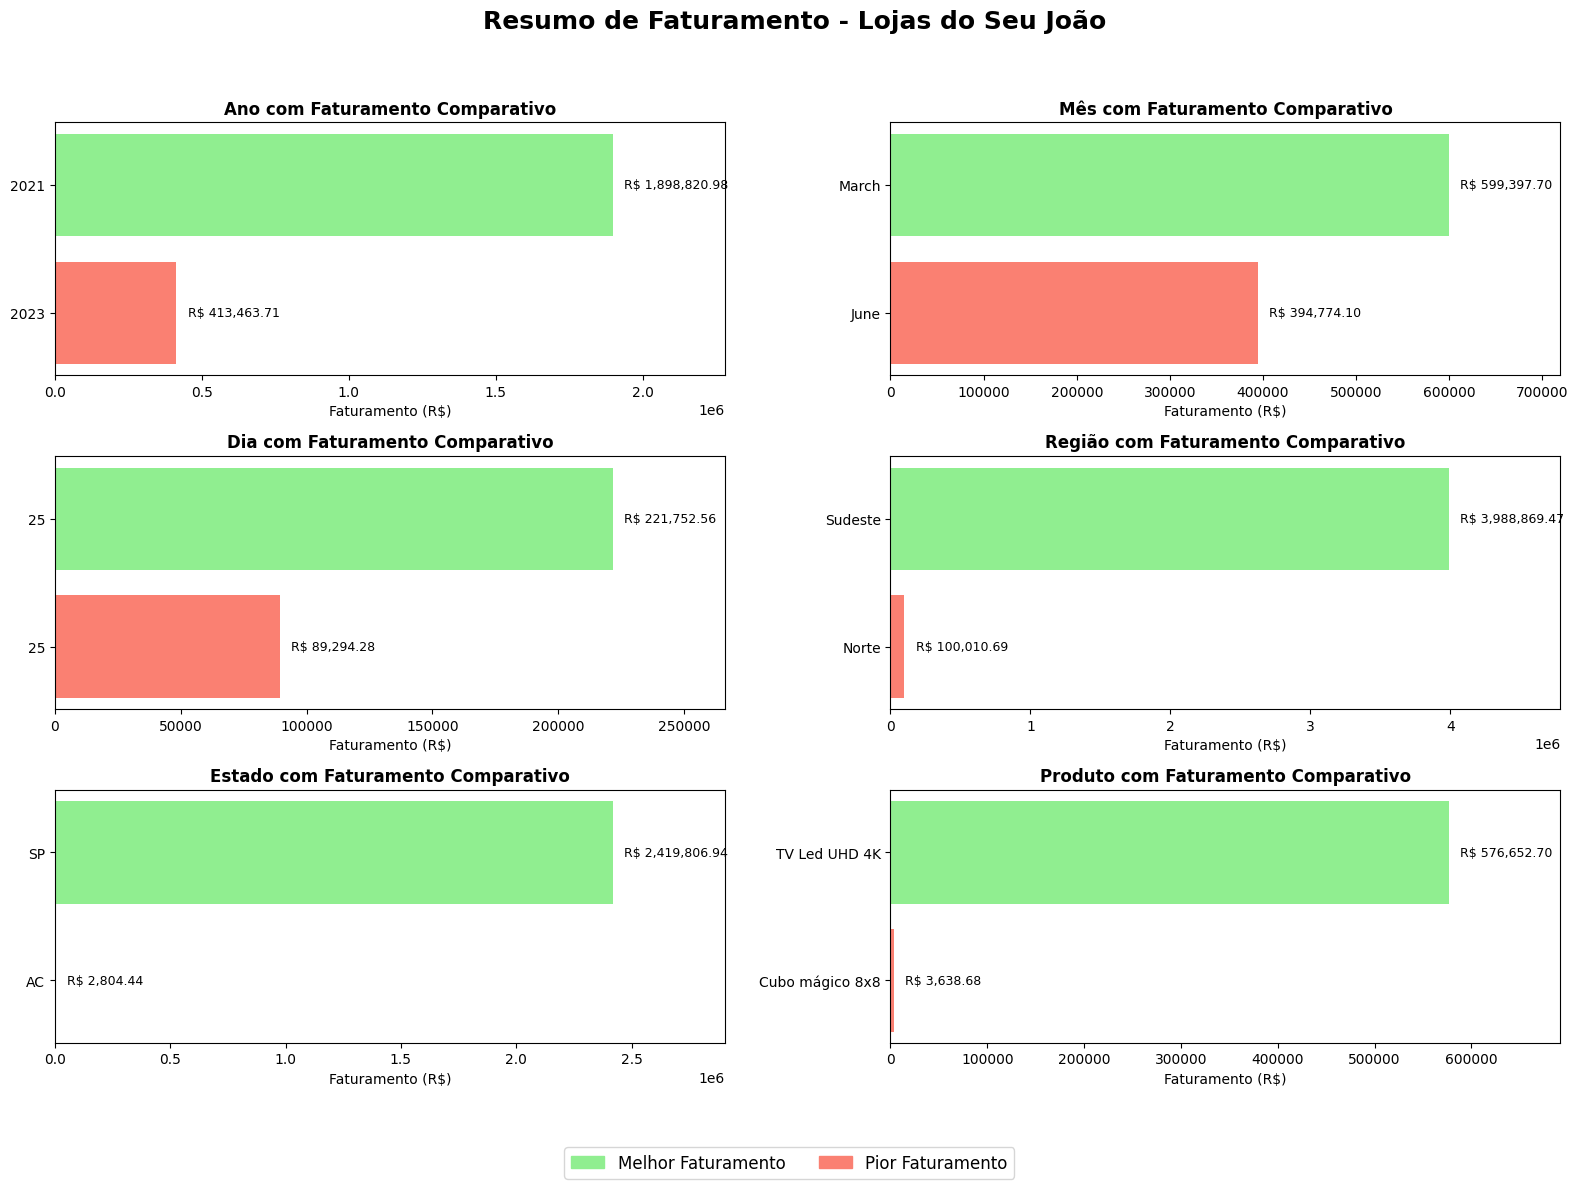

In [96]:
import matplotlib.patches as mpatches

# Gráfico com 6 subplots: ano, mês, dia, região, estado, produto
# Dados consolidados que já foram calculados:
dados_resumo = {
    'Melhor': {
        'Ano': (ano_maior_faturamento_anual, maior_faturamento_anual),
        'Mês': (mes_maior_faturamento_mensal, maior_faturamento_mensal),
        'Dia': (data_maior_faturamento_diario, maior_faturamento_diario),
        'Região': (regiao_maior_faturamento_regiao, maior_faturamento_regiao),
        'Estado': (estado_maior_faturamento_estado, maior_faturamento_estado),
        'Produto': (produto_maior_faturamento_produto, maior_faturamento_produto)
    },
    'Pior': {
        'Ano': (ano_menor_faturamento_anual, menor_faturamento_anual),
        'Mês': (mes_menor_faturamento_mensal, menor_faturamento_mensal),
        'Dia': (data_menor_faturamento_diario, menor_faturamento_diario),
        'Região': (regiao_menor_faturamento_regiao, menor_faturamento_regiao),
        'Estado': (estado_menor_faturamento_estado, menor_faturamento_estado),
        'Produto': (produto_menor_faturamento_produto, menor_faturamento_produto)
    }
}

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Resumo de Faturamento - Lojas do Seu João', fontsize=18, fontweight='bold')
axs = axs.flatten()

categorias = ['Ano', 'Mês', 'Dia', 'Região', 'Estado', 'Produto']

for i, cat in enumerate(categorias):
    melhor, valor_melhor = dados_resumo['Melhor'][cat]
    pior, valor_pior = dados_resumo['Pior'][cat]
    
    # Dados
    valores = [valor_pior, valor_melhor]
    labels = [f'{pior}', f'{melhor}']
    
    # Barras horizontais
    bars = axs[i].barh(['Pior', 'Melhor'], valores, color=['salmon', 'lightgreen'])
    axs[i].set_title(f'{cat} com Faturamento Comparativo', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('Faturamento (R$)')
    axs[i].set_xlim(left=0, right=max(valores) * 1.2)  # adiciona margem para os rótulos não cortarem
    
    # Atualiza os nomes nas barras (eixo y)
    axs[i].set_yticks([0, 1])
    axs[i].set_yticklabels(labels)
    
    # Rótulos fora da barra, na extremidade
    for bar in bars:
        width = bar.get_width()
        axs[i].text(width + (max(valores) * 0.02), bar.get_y() + bar.get_height() / 2,
                    f'R$ {width:,.2f}', va='center', ha='left', fontsize=9)

# Criação da legenda personalizada
melhor_patch = mpatches.Patch(color='lightgreen', label='Melhor Faturamento')
pior_patch = mpatches.Patch(color='salmon', label='Pior Faturamento')
fig.legend(handles=[melhor_patch, pior_patch], loc='lower center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.07, 1, 0.95])  # Ajusta espaço para legenda abaixo dos gráficos
plt.show()

## Aqui vamos analisar o Volume de Vendas (Total e Loja) por Ano, Mês e Dia

In [18]:
# Volume total de vendas das lojas

total_vendido = df_geral.shape[0]

total_vendido

9435

In [19]:
# Volume total de vendas por ano

volume_total_vendido_por_ano = df_geral.groupby('Ano')['Produto'].count().reset_index()

volume_total_vendido_por_ano

,Ano,Produto
0,2020,2861
1,2021,2982
2,2022,2873
3,2023,719


In [20]:
# Volume total de vendas das lojas por ano

volume_total_vendido_por_loja = df_geral.groupby('loja')['Produto'].count().reset_index()

volume_total_vendido_por_loja

,loja,Produto
0,Loja_1,2359
1,Loja_2,2359
2,Loja_3,2359
3,Loja_4,2358


In [21]:
# Volume total anual por loja

volume_total_vendido_por_loja_ano = df_geral.groupby(['Ano', 'loja'])['Produto'].count().reset_index()

# Ordenar o DataFrame pelo maior faturamento anual
volume_total_vendido_por_loja_ano_ordenado = volume_total_vendido_por_loja_ano.sort_values(by='Produto', ascending=False)

volume_total_vendido_por_loja_ano_ordenado

,Ano,loja,Produto
5,2021,Loja_2,759
3,2020,Loja_4,745
7,2021,Loja_4,744
6,2021,Loja_3,740
10,2022,Loja_3,740
4,2021,Loja_1,739
0,2020,Loja_1,715
8,2022,Loja_1,713
11,2022,Loja_4,712
9,2022,Loja_2,708


In [22]:
# Volume total mensal por loja

volume_total_vendido_por_loja_mes = df_geral.groupby(['Mês_Nome', 'loja'])['Produto'].count().reset_index()

# Ordenar o DataFrame pelo maior faturamento anual
volume_total_vendido_por_loja_mes_ordenado = volume_total_vendido_por_loja_mes.sort_values(by='Produto', ascending=False)

volume_total_vendido_por_loja_mes_ordenado

,Mês_Nome,loja,Produto
29,March,Loja_2,267
28,March,Loja_1,265
30,March,Loja_3,257
18,January,Loja_3,255
31,March,Loja_4,252
15,February,Loja_4,252
17,January,Loja_2,251
12,February,Loja_1,248
16,January,Loja_1,240
19,January,Loja_4,239


In [23]:
# Volume total diário por loja

volume_total_vendido_por_loja_dia = df_geral.groupby(['Dia', 'loja'])['Produto'].count().reset_index()

# Ordenar o DataFrame pelo maior faturamento anual
volume_total_vendido_por_loja_dia_ordenado = volume_total_vendido_por_loja_dia.sort_values(by='Produto', ascending=False)

volume_total_vendido_por_loja_dia_ordenado

,Dia,loja,Produto
58,15,Loja_3,99
57,15,Loja_2,94
43,11,Loja_4,94
46,12,Loja_3,93
10,3,Loja_3,92
...,...,...,...
14,4,Loja_3,54
122,31,Loja_3,43
121,31,Loja_2,42
123,31,Loja_4,40


### Respostas sobre volume de vendas analisadas

In [24]:
# 1 - Qual foi o maior volume de vendas de produtos anual, mensal e diário?

melhor_volume_anual = df_geral.groupby('Ano')['Produto'].count()
maior_volume_anual = melhor_volume_anual.max()
ano_maior_volume_anual = melhor_volume_anual[melhor_volume_anual == maior_volume_anual].index[0]

print(f"O melhor desempenho em volume de vendas anual nas lojas foi no ano de {ano_maior_volume_anual}, com um total de {maior_volume_anual} produtos vendidos!")

melhor_volume_mensal = df_geral.groupby('Mês_Nome')['Produto'].count()
maior_volume_mensal = melhor_volume_mensal.max()
mes_maior_volume_mensal = melhor_volume_mensal[melhor_volume_mensal == maior_volume_mensal].index[0]

print(f"O melhor desempenho em volume de vendas mensal nas lojas foram nos meses de {mes_maior_volume_mensal}, com um total de {maior_volume_mensal} produtos vendidos!") 

melhor_volume_diario = df_geral.groupby('Dia')['Produto'].count()
maior_volume_diario = melhor_volume_diario.max()
data_maior_volume_diario = melhor_volume_diario[melhor_volume_diario == maior_volume_diario].index[0]

print(f"O melhor desempenho em volume de vendas diário nas lojas foram nos dias {data_maior_volume_diario}, com um total de {maior_volume_diario} produtos vendidos!")   


# 2 - Qual foi o pior volume de vendas de produtos anual, mensal e diário?

pior_volume_anual = df_geral.groupby('Ano')['Produto'].count()
menor_volume_anual = pior_volume_anual.min()
ano_menor_volume_anual = pior_volume_anual[pior_volume_anual == menor_volume_anual].index[0]

print(f"O pior desempenho em volume anual de vendas nas lojas foi no ano de {ano_menor_volume_anual}, com um total de {menor_volume_anual} produtos vendidos!")

pior_volume_mensal = df_geral.groupby('Mês_Nome')['Produto'].count()
menor_volume_mensal = pior_volume_mensal.min()
mes_menor_volume_mensal = pior_volume_mensal[pior_volume_mensal == menor_volume_mensal].index[0]

print(f"O pior desempenho em volume mensal de vendas nas lojas foi no mês de {mes_menor_volume_mensal}, com um total de {menor_volume_mensal} produtos vendidos!")

pior_volume_diario = df_geral.groupby('Dia')['Produto'].count()
menor_volume_dia = pior_volume_diario.min()
dia_menor_volume_dia = pior_volume_diario[pior_volume_diario == menor_volume_dia].index[0]

print(f"O pior desempenho em volume diário de vendas nas lojas foi no dia {dia_menor_volume_dia}, com um total de {menor_volume_dia} produtos vendidos!")

# 3 - Qual Região mais e menos comprou em volume de produtos nas Lojas do Seu João?

melhor_volume_regiao = df_geral.groupby('Região')['Produto'].count()
maior_volume_regiao = melhor_volume_regiao.max()
regiao_maior_volume_regiao = melhor_volume_regiao[melhor_volume_regiao == maior_volume_regiao].index[0]

print(f"O melhor desempenho em volume de vendas nas lojas foi na Região {regiao_maior_volume_regiao}, com um total de{maior_volume_regiao: } produtos vendidos!") 

pior_volume_regiao = df_geral.groupby('Região')['Produto'].count()
menor_volume_regiao = pior_volume_regiao.min()
regiao_menor_volume_regiao = pior_volume_regiao[pior_volume_regiao == menor_volume_regiao].index[0]

print(f"O pior desempenho em volume de vendas nas lojas foi na Região {regiao_menor_volume_regiao}, com um total de{menor_volume_regiao: } produtos vendidos!") 

# 4 - Qual Estado mais e menos comprou em volume de produtos nas Lojas do seu João?

melhor_volume_estado = df_geral.groupby('Local da compra')['Produto'].count()
maior_volume_estado = melhor_volume_estado.max()
estado_maior_volume_estado = melhor_volume_estado[melhor_volume_estado == maior_volume_estado].index[0]

print(f"O melhor desempenho em volume de vendas nas lojas foi no Estado {estado_maior_volume_estado}, com um total de{maior_volume_estado: } produtos vendidos!") 

pior_volume_estado = df_geral.groupby('Local da compra')['Produto'].count()
menor_volume_estado = pior_volume_estado.min()
estado_menor_volume_estado = pior_volume_estado[pior_volume_estado == menor_volume_estado].index[0]

print(f"O pior desempenho em volume de vendas nas lojas foi no Estado {estado_menor_volume_estado}, com um total de{menor_volume_estado: } produtos vendidos!")

# 5 - Qual Produto mais e menos ajudou no volume de vendas nas Lojas do seu João?

melhor_volume_produto = df_geral.groupby('Produto')['Produto'].count()
maior_volume_produto = melhor_volume_produto.max()
produto_maior_volume_produto = melhor_volume_produto[melhor_volume_produto == maior_volume_produto].index[0]

print(f"O melhor desempenho de volume de vendas foi no produto {produto_maior_volume_produto}, com um total de {maior_volume_produto} produtos vendidos!")

pior_volume_produto = df_geral.groupby('Produto')['Produto'].count()
menor_volume_produto = pior_volume_produto.min()
produto_menor_volume_produto = pior_volume_produto[pior_volume_produto == menor_volume_produto].index[0]

print(f"O pior desempenho de volume de vendas foi no produto {produto_menor_volume_produto}, com um total de {menor_volume_produto} produtos vendidos!")


O melhor desempenho em volume de vendas anual nas lojas foi no ano de 2021, com um total de 2982 produtos vendidos!
O melhor desempenho em volume de vendas mensal nas lojas foram nos meses de March, com um total de 1041 produtos vendidos!
O melhor desempenho em volume de vendas diário nas lojas foram nos dias 15, com um total de 349 produtos vendidos!
O pior desempenho em volume anual de vendas nas lojas foi no ano de 2023, com um total de 719 produtos vendidos!
O pior desempenho em volume mensal de vendas nas lojas foi no mês de June, com um total de 660 produtos vendidos!
O pior desempenho em volume diário de vendas nas lojas foi no dia 31, com um total de 157 produtos vendidos!
O melhor desempenho em volume de vendas nas lojas foi na Região Sudeste, com um total de 6428 produtos vendidos!
O pior desempenho em volume de vendas nas lojas foi na Região Norte, com um total de 157 produtos vendidos!
O melhor desempenho em volume de vendas nas lojas foi no Estado SP, com um total de 3943 

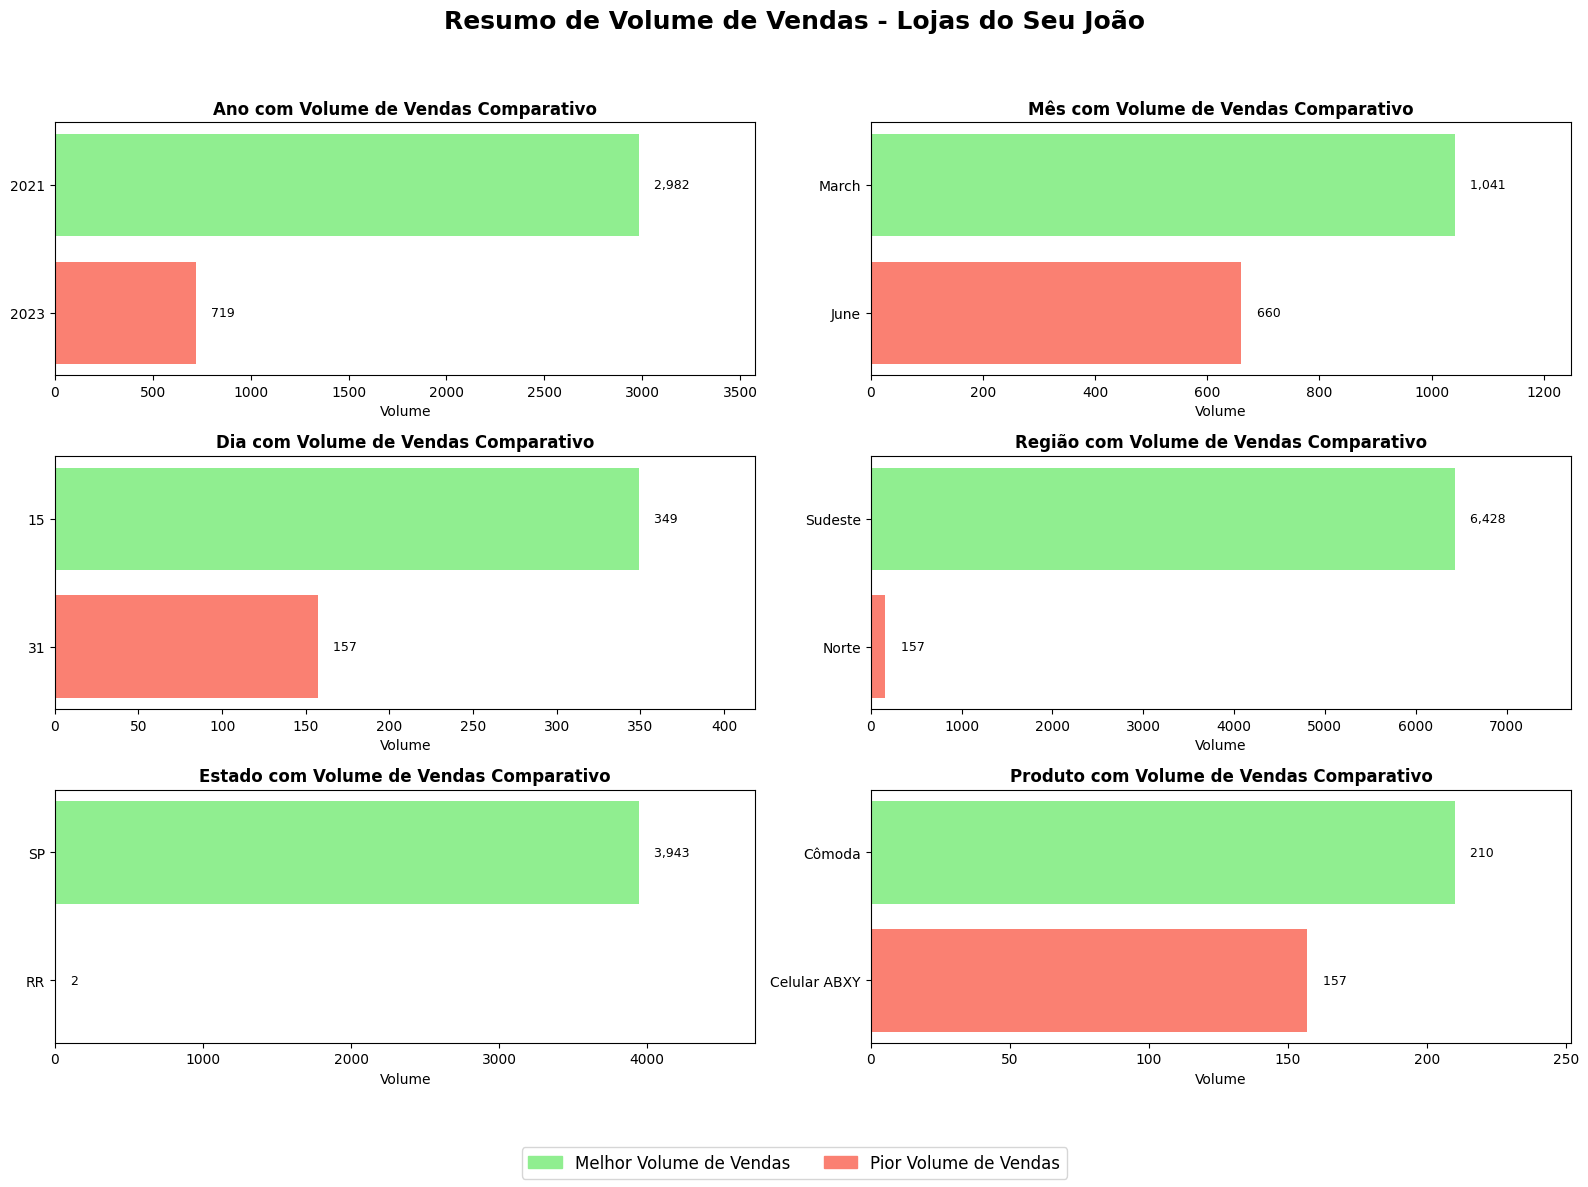

In [25]:
import matplotlib.patches as mpatches

# Gráfico com 6 subplots: ano, mês, dia, região, estado, produto
# Dados consolidados que já foram calculados:
dados_resumo_volume = {
    'Melhor': {
        'Ano': (ano_maior_volume_anual, maior_volume_anual),
        'Mês': (mes_maior_volume_mensal, maior_volume_mensal),
        'Dia': (data_maior_volume_diario, maior_volume_diario),
        'Região': (regiao_maior_volume_regiao, maior_volume_regiao),
        'Estado': (estado_maior_volume_estado, maior_volume_estado),
        'Produto': (produto_maior_volume_produto, maior_volume_produto)
    },
    'Pior': {
        'Ano': (ano_menor_volume_anual, menor_volume_anual),
        'Mês': (mes_menor_faturamento_mensal, menor_volume_mensal),
        'Dia': (dia_menor_volume_dia, menor_volume_dia),
        'Região': (regiao_menor_volume_regiao, menor_volume_regiao),
        'Estado': (estado_menor_volume_estado, menor_volume_estado),
        'Produto': (produto_menor_volume_produto, menor_volume_produto)
    }
}

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Resumo de Volume de Vendas - Lojas do Seu João', fontsize=18, fontweight='bold')
axs = axs.flatten()

categorias = ['Ano', 'Mês', 'Dia', 'Região', 'Estado', 'Produto']

for i, cat in enumerate(categorias):
    melhor, valor_melhor = dados_resumo_volume['Melhor'][cat]
    pior, valor_pior = dados_resumo_volume['Pior'][cat]
    
    # Dados
    valores = [valor_pior, valor_melhor]
    labels = [f'{pior}', f'{melhor}']
    
    # Barras horizontais
    bars = axs[i].barh(['Pior', 'Melhor'], valores, color=['salmon', 'lightgreen'])
    axs[i].set_title(f'{cat} com Volume de Vendas Comparativo', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('Volume')
    axs[i].set_xlim(left=0, right=max(valores) * 1.2)  # adiciona margem para os rótulos não cortarem
    
    # Atualiza os nomes nas barras (eixo y)
    axs[i].set_yticks([0, 1])
    axs[i].set_yticklabels(labels)
    
    # Rótulos fora da barra, na extremidade
    for bar in bars:
        width = bar.get_width()
        axs[i].text(width + (max(valores) * 0.02), bar.get_y() + bar.get_height() / 2,
                    f' {width:,}', va='center', ha='left', fontsize=9)

# Criação da legenda personalizada
melhor_patch = mpatches.Patch(color='lightgreen', label='Melhor Volume de Vendas')
pior_patch = mpatches.Patch(color='salmon', label='Pior Volume de Vendas')
fig.legend(handles=[melhor_patch, pior_patch], loc='lower center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.07, 1, 0.95])  # Ajusta espaço para legenda abaixo dos gráficos
plt.show()

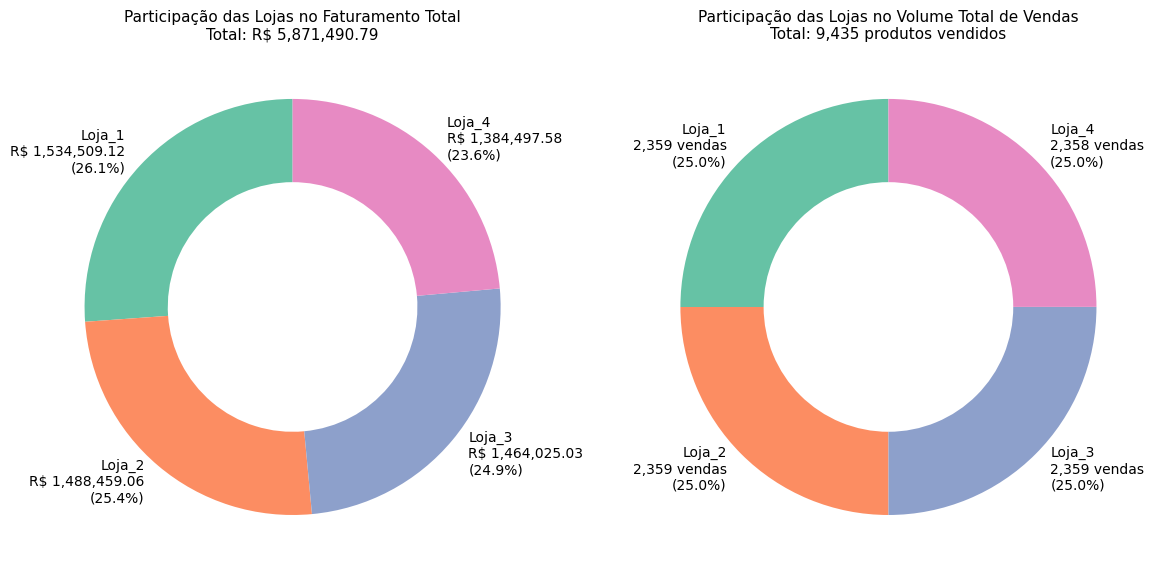

In [91]:
# Faturamento por loja
faturamento_por_loja = df_geral.groupby('loja')['Preço'].sum()
faturamento_total = faturamento_por_loja.sum()

# Labels do faturamento
labels_faturamento = [f'{loja}\nR$ {valor:,.2f}\n({(valor/faturamento_total)*100:.1f}%)' 
                      for loja, valor in faturamento_por_loja.items()]

# Volume de vendas por loja
volume_por_loja = df_geral['loja'].value_counts()
volume_total = volume_por_loja.sum()

# Labels do volume
labels_volume = [f'{loja}\n{quantidade:,} vendas\n({(quantidade/volume_total)*100:.1f}%)' 
                 for loja, quantidade in volume_por_loja.items()]

# Cores padronizadas
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Criação dos gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Faturamento
axs[0].pie(faturamento_por_loja, labels=labels_faturamento, startangle=90,
           colors=cores, wedgeprops=dict(width=0.4))
axs[0].set_title(f'Participação das Lojas no Faturamento Total\nTotal: R$ {faturamento_total:,.2f}', fontsize=11)

# Gráfico 2: Volume
axs[1].pie(volume_por_loja, labels=labels_volume, startangle=90,
           colors=cores, wedgeprops=dict(width=0.4))
axs[1].set_title(f'Participação das Lojas no Volume Total de Vendas\nTotal: {volume_total:,} produtos vendidos', fontsize=11)

plt.tight_layout()
plt.show()


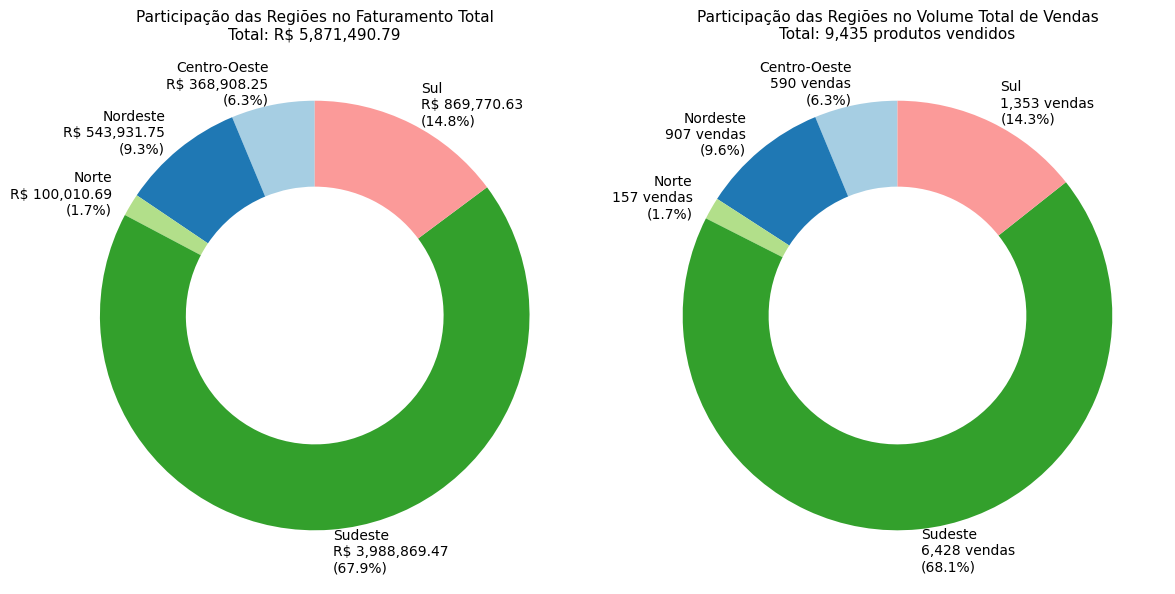

In [70]:
# Faturamento por região
faturamento_por_regiao = df_geral.groupby('Região')['Preço'].sum()
faturamento_total_regiao = faturamento_por_regiao.sum()

# Labels do faturamento por região
labels_faturamento_regiao = [f'{regiao}\nR$ {valor:,.2f}\n({(valor/faturamento_total_regiao)*100:.1f}%)'
                             for regiao, valor in faturamento_por_regiao.items()]

# Volume de vendas por região
volume_por_regiao = df_geral.groupby('Região').size()
volume_total_regiao = volume_por_regiao.sum()

# Labels do volume por região
labels_volume_regiao = [f'{regiao}\n{quantidade:,} vendas\n({(quantidade/volume_total_regiao)*100:.1f}%)'
                        for regiao, quantidade in volume_por_regiao.items()]

# Cores padronizadas (você pode ajustar conforme o número de regiões)
cores_regiao = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

# Criação dos gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Faturamento por Região
axs[0].pie(faturamento_por_regiao, labels=labels_faturamento_regiao, startangle=90,
            colors=cores_regiao[:len(faturamento_por_regiao)], wedgeprops=dict(width=0.4))
axs[0].set_title(f'Participação das Regiões no Faturamento Total\nTotal: R$ {faturamento_total_regiao:,.2f}', fontsize=11)

# Gráfico 2: Volume por Região
axs[1].pie(volume_por_regiao, labels=labels_volume_regiao, startangle=90,
            colors=cores_regiao[:len(volume_por_regiao)], wedgeprops=dict(width=0.4))
axs[1].set_title(f'Participação das Regiões no Volume Total de Vendas\nTotal: {volume_total_regiao:,} produtos vendidos', fontsize=11)

plt.tight_layout()
plt.show()

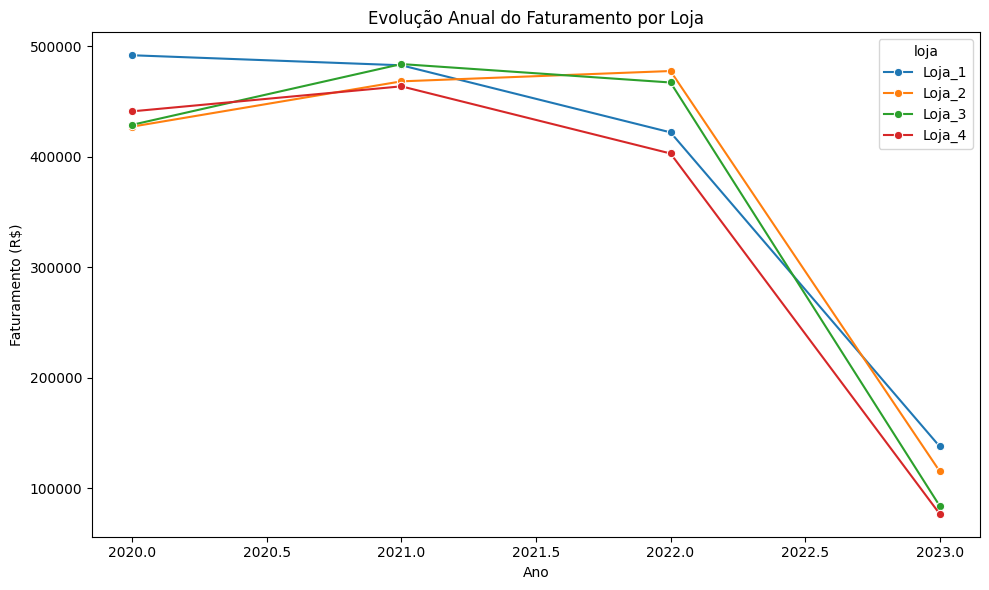

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12328\36893313.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Mostrar a legenda dos limites


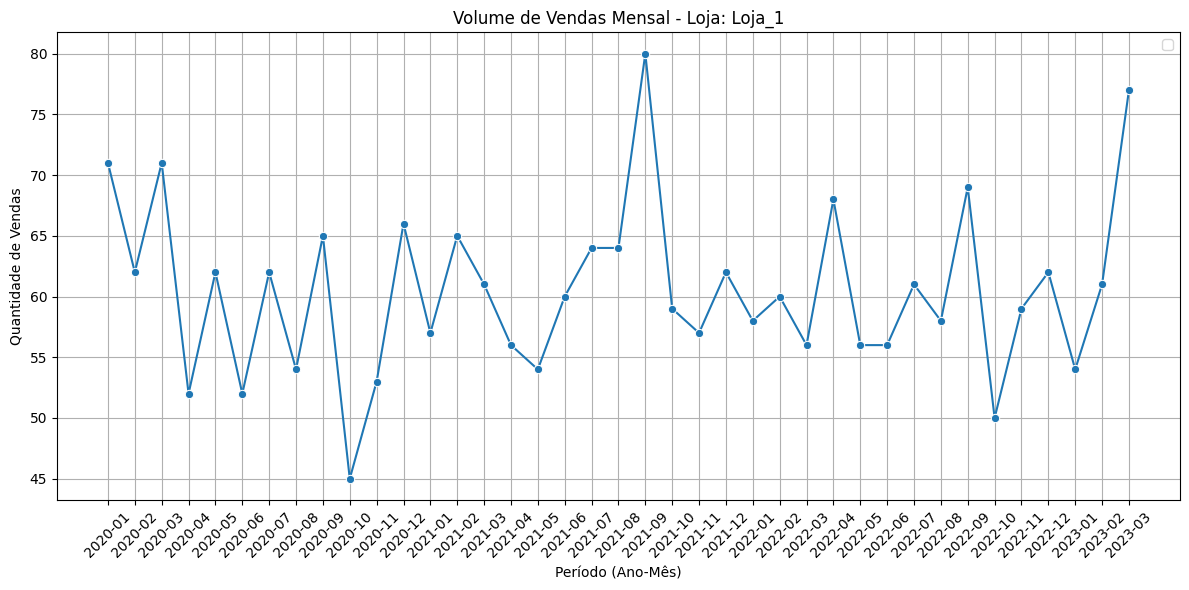

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12328\36893313.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Mostrar a legenda dos limites


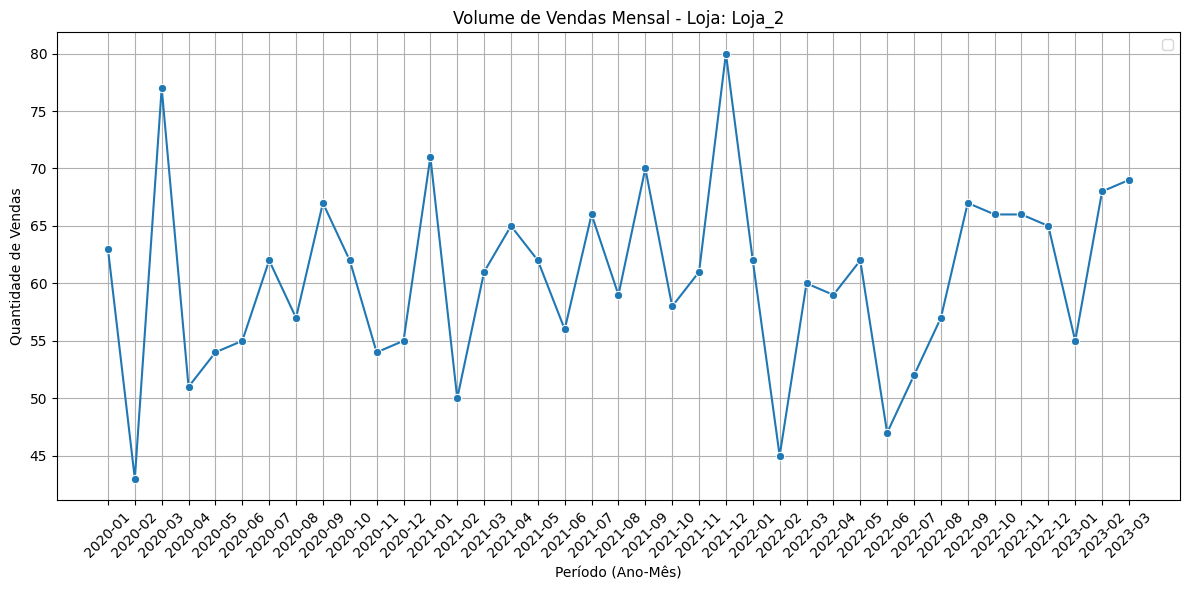

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12328\36893313.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Mostrar a legenda dos limites


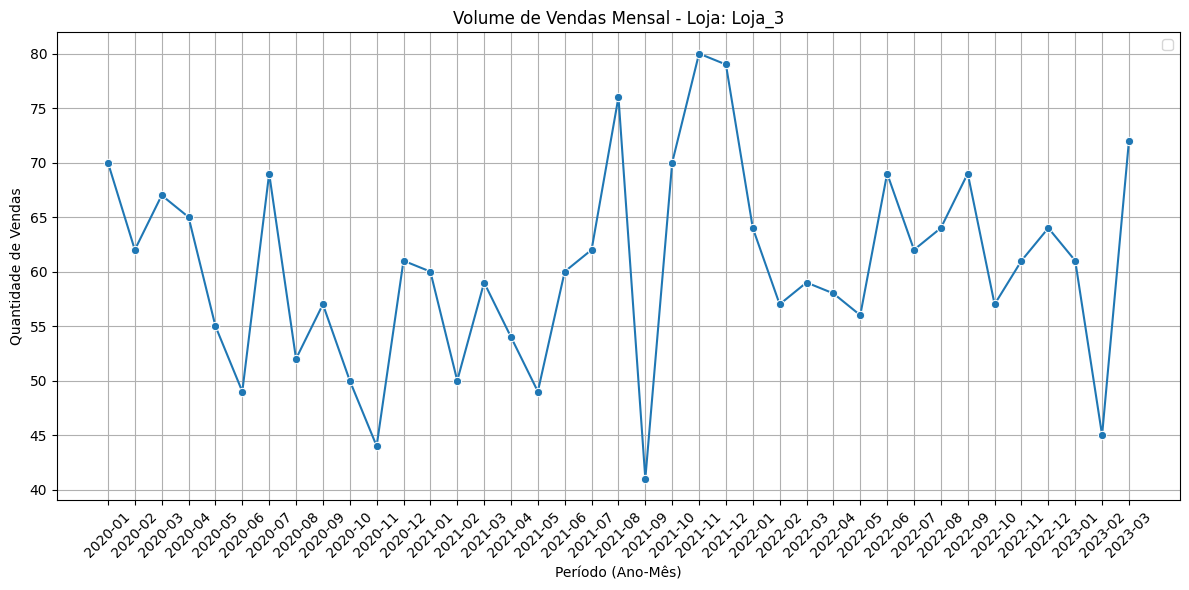

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12328\36893313.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Mostrar a legenda dos limites


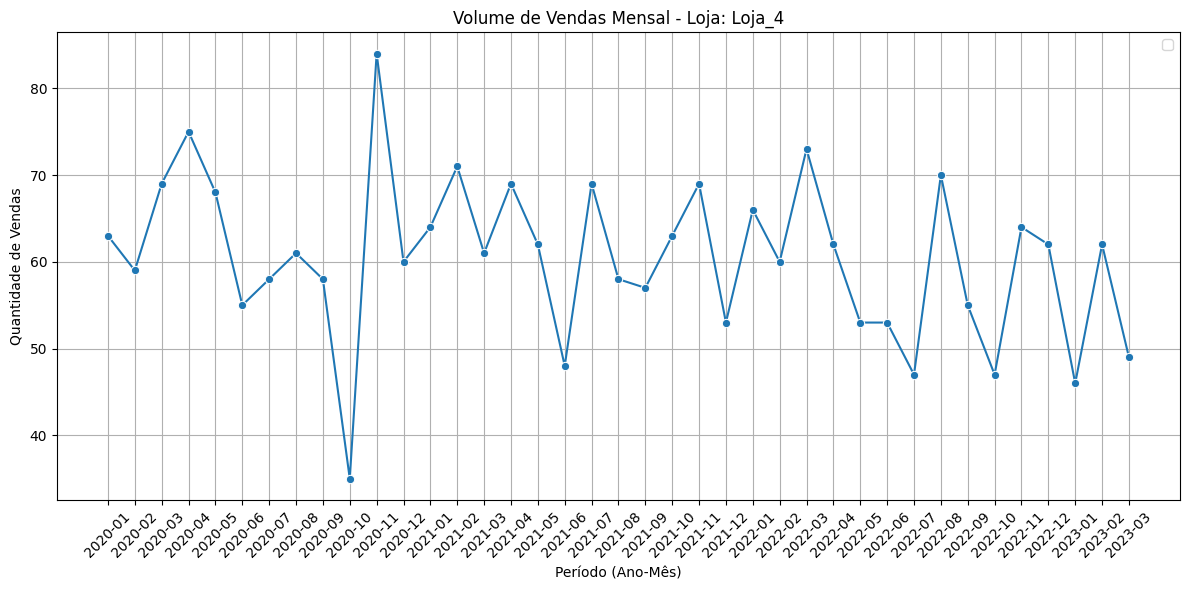

In [27]:
# Agregar faturamento por loja e ano
faturamento_anual = df_geral.groupby(['Ano', 'loja'])['Preço'].sum().reset_index()

# 1. Gráfico - Evolução comparativa de faturamento das Lojas ao longo dos anos
plt.figure(figsize=(10, 6))
sns.lineplot(data=faturamento_anual, x='Ano', y='Preço', hue='loja', marker='o')

plt.title('Evolução Anual do Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Agrupar os dados por loja e 'AnoMes' para obter o volume de vendas mensal por loja
vendas_mensais_por_loja = df_geral.groupby(['loja', 'AnoMes']).size().reset_index(name='Quantidade de Vendas')

# Definir os limites inferior e superior
#limite_inferior = vendas_mensais_por_loja['Quantidade de Vendas'].mean() - 1.5 * vendas_mensais_por_loja['Quantidade de Vendas'].std()
#limite_superior = vendas_mensais_por_loja['Quantidade de Vendas'].mean() + 1.5 * vendas_mensais_por_loja['Quantidade de Vendas'].std()

# Obter a lista única de lojas
lojas = vendas_mensais_por_loja['loja'].unique()

# Criar um gráfico separado para cada loja com os limites
for loja in lojas:
    dados_loja = vendas_mensais_por_loja[vendas_mensais_por_loja['loja'] == loja]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dados_loja, x='AnoMes', y='Quantidade de Vendas', marker='o')

    # Adicionar linhas horizontais para os limites
    #plt.axhline(limite_inferior, color='red', linestyle='--', label=f'Limite Inferior ({limite_inferior:.2f})')
    #plt.axhline(limite_superior, color='green', linestyle='--', label=f'Limite Superior ({limite_superior:.2f})')

    plt.title(f'Volume de Vendas Mensal - Loja: {loja}')
    plt.xlabel('Período (Ano-Mês)')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=45)
    plt.legend()  # Mostrar a legenda dos limites
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# 2. Vendas por Categoria

In [28]:
# 1. Cálculo do faturamento total por categoria
faturamento_categoria = df_geral.groupby('Categoria do Produto')['Preço'].sum().reset_index()
faturamento_categoria.columns = ['Categoria do Produto', 'faturamento']

# Ordena pelo faturamento decrescente
faturamento_categoria = faturamento_categoria.sort_values(by='faturamento', ascending=False)

# 2. Cálculo do volume de vendas por categoria
vendas_categoria = df_geral['Categoria do Produto'].value_counts().reset_index()
vendas_categoria.columns = ['Categoria do Produto', 'quantidade']

# 3. Cálculo do percentual de participação
faturamento_categoria['percentual'] = (faturamento_categoria['faturamento'] / faturamento_categoria['faturamento'].sum()) * 100
vendas_categoria['percentual'] = (vendas_categoria['quantidade'] / vendas_categoria['quantidade'].sum()) * 100

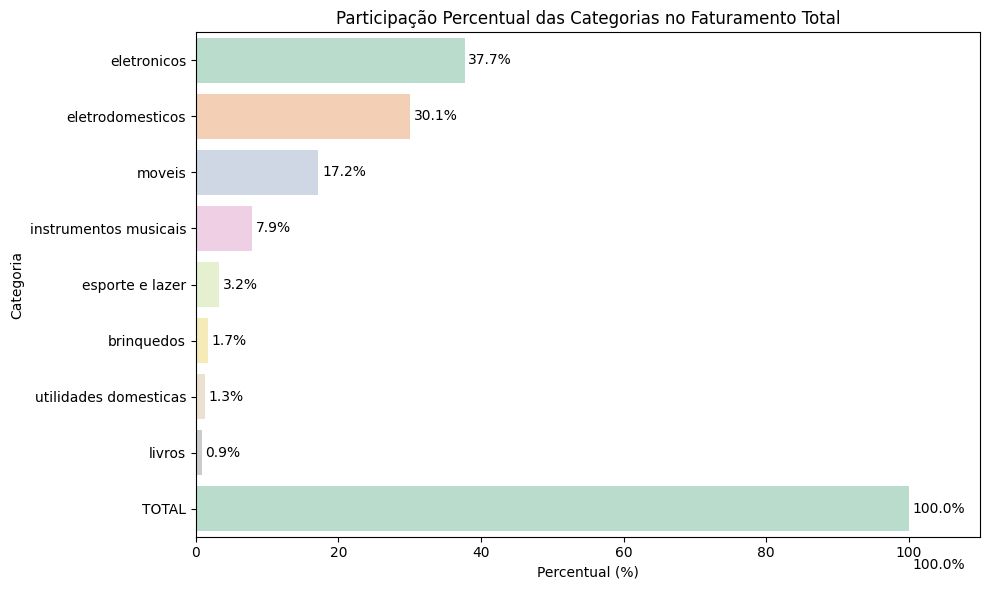

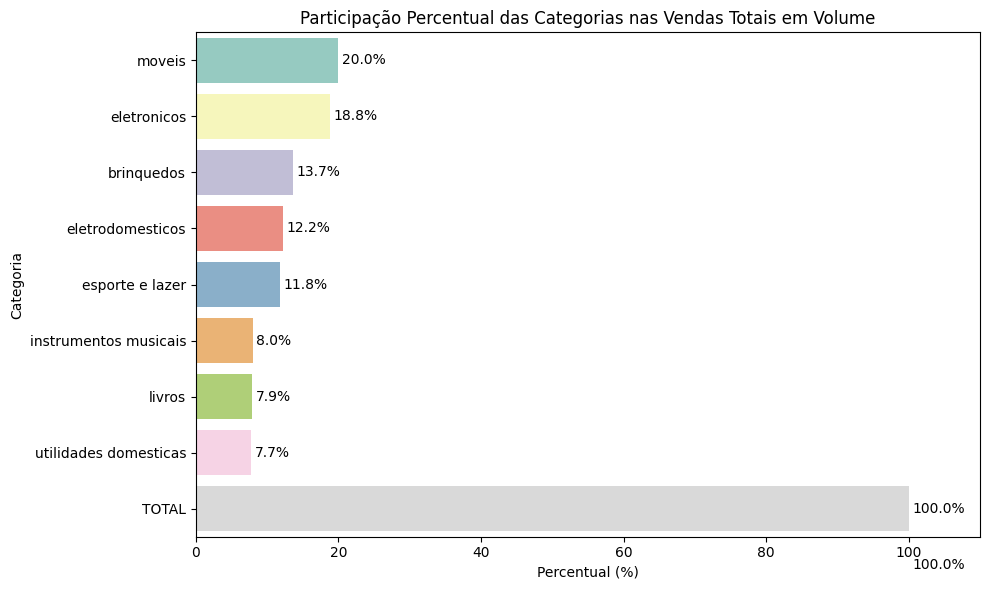

NameError: name 'df_agg' is not defined

<Figure size 1200x600 with 0 Axes>

In [83]:
# 1. Adiciona linha TOTAL para visualização
linha_total_faturamento = pd.DataFrame({
    'Categoria do Produto': ['TOTAL'],
    'faturamento': [faturamento_categoria['faturamento'].sum()],
    'percentual': [100.0]
})
faturamento_categoria = pd.concat([faturamento_categoria, linha_total_faturamento], ignore_index=True)

linha_total_vendas = pd.DataFrame({
    'Categoria do Produto': ['TOTAL'],
    'quantidade': [vendas_categoria['quantidade'].sum()],
    'percentual': [100.0]
})
vendas_categoria = pd.concat([vendas_categoria, linha_total_vendas], ignore_index=True)

# 2. Gráfico - Participação percentual no faturamento
plt.figure(figsize=(10, 6))
sns.barplot(
    data=faturamento_categoria,
    x='percentual',
    y='Categoria do Produto',
    palette='Pastel2',
    hue='Categoria do Produto',
    dodge=False,
    legend=False
)

for i, row in faturamento_categoria.iterrows():
    plt.text(row['percentual'] + 0.5, i, f"{row['percentual']:.1f}%", va='center')

plt.xlim(0, 110)
plt.title('Participação Percentual das Categorias no Faturamento Total')
plt.xlabel('Percentual (%)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# 3. Gráfico - Participação percentual no volume de vendas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=vendas_categoria,
    x='percentual',
    y='Categoria do Produto',
    palette='Set3',
    hue='Categoria do Produto',
    dodge=False,
    legend=False
)

for i, row in vendas_categoria.iterrows():
    plt.text(row['percentual'] + 0.5, i, f"{row['percentual']:.1f}%", va='center')

plt.xlim(0, 110)
plt.title('Participação Percentual das Categorias nas Vendas Totais em Volume')
plt.xlabel('Percentual (%)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# 4. Gráfico - Participação no faturamento por loja
plt.figure(figsize=(12, 6))
sns.barplot(data=df_agg, x='Categoria do Produto', y='faturamento', hue='loja', dodge=True)
plt.title('Faturamento por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# 5. Gráfico - Participação no volume de vendas por loja
plt.figure(figsize=(12, 6))
sns.barplot(data=df_agg, x='Categoria do Produto', y='quantidade_vendida', hue='loja', dodge=True)
plt.title('Volume de Vendas por Categoria em Cada Loja')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# Avaliações Mais Positivas (Vendedor - Loja - Local da Compra - Produto)

# Agrupamento por Vendedor
melhor_avaliacao_por_vendedor = df_geral.groupby('Vendedor')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
melhor_avaliacao_por_vendedor = melhor_avaliacao_por_vendedor.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Loja
melhor_avaliacao_por_loja = df_geral.groupby('loja')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
melhor_avaliacao_por_loja = melhor_avaliacao_por_loja.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Região da compra
melhor_avaliacao_por_regiao = df_geral.groupby('Região')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
melhor_avaliacao_por_regiao = melhor_avaliacao_por_regiao.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Local da compra
melhor_avaliacao_por_local = df_geral.groupby('Local da compra')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
melhor_avaliacao_por_local = melhor_avaliacao_por_local.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Produto
melhor_avaliacao_por_produto = df_geral.groupby('Produto')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
melhor_avaliacao_por_produto = melhor_avaliacao_por_produto.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Avaliações Mais Negativas (Vendedor - Loja - Local da Compra - Produto)

# Agrupamento por Vendedor
pior_avaliacao_por_vendedor = df_geral.groupby('Vendedor')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=True)
pior_avaliacao_por_vendedor = pior_avaliacao_por_vendedor.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Loja
pior_avaliacao_por_loja = df_geral.groupby('loja')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=True)
pior_avaliacao_por_loja = pior_avaliacao_por_loja.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Região da compra
pior_avaliacao_por_regiao = df_geral.groupby('Região')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=True)
pior_avaliacao_por_regiao = pior_avaliacao_por_regiao.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Local da compra
pior_avaliacao_por_local = df_geral.groupby('Local da compra')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=True)
pior_avaliacao_por_local = pior_avaliacao_por_local.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Produto
pior_avaliacao_por_produto = df_geral.groupby('Produto')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=True)
pior_avaliacao_por_produto = pior_avaliacao_por_produto.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

Respostas das Avaliações Positivas por Vendedor, Loja, Local da compra e Produto

In [ ]:
# Exibição dos TOP 5 dos Vendedores
print("Avaliação da pesquisa de satisfação dos Vendedores:")
melhor_avaliacao_por_vendedor.head(5).round(2)

Avaliação da pesquisa de satisfação dos Vendedores:


,Qtd Avaliações,Média Avaliação
Vendedor,,
Bruno Rodrigues,684,4.13
Felipe Santos,701,4.08
Mariana Ferreira,656,4.07
Rafael Costa,625,4.06
Beatriz Moraes,650,4.05


In [ ]:
print("\nAvaliação da pesquisa de satisfação das Lojas:")
melhor_avaliacao_por_loja.head().round(2)


Avaliação da pesquisa de satisfação das Lojas:


,Qtd Avaliações,Média Avaliação
loja,,
Loja_3,2359,4.05
Loja_2,2359,4.04
Loja_4,2358,4.00
Loja_1,2359,3.98


In [ ]:
print("\nAvaliação da pesquisa de satisfação das regiões de compra:")
melhor_avaliacao_por_regiao.head().round(2)


Avaliação da pesquisa de satisfação das regiões de compra:


,Qtd Avaliações,Média Avaliação
Região,,
Sudeste,6428,4.04
Sul,1353,4.04
Centro-Oeste,590,4.02
Nordeste,907,3.81
Norte,157,3.77


In [ ]:
print("\nAvaliação da pesquisa de satisfação dos locais de compra:")
melhor_avaliacao_por_local.head().round(2)


Avaliação da pesquisa de satisfação dos locais de compra:


,Qtd Avaliações,Média Avaliação
Local da compra,,
RN,48,4.21
SP,3943,4.11
MT,80,4.11
MS,82,4.10
MG,1102,4.09


In [ ]:
print("\nAvaliação da pesquisa de satisfação dos produtos vendidos:")
melhor_avaliacao_por_produto.head().round(2)


Avaliação da pesquisa de satisfação dos produtos vendidos:


,Qtd Avaliações,Média Avaliação
Produto,,
Impressora,188,4.24
Jogo de tabuleiro,175,4.22
Poltrona,168,4.18
Geladeira,191,4.16
Iniciando em programação,195,4.13


Respostas das Avaliações Negativas por Vendedor, Loja, Local da compra e Produto

In [ ]:
# Exibição dos TOP 5 dos Vendedores
print("Avaliação da pesquisa de satisfação dos Vendedores:")
pior_avaliacao_por_vendedor.head(5).round(2)

Avaliação da pesquisa de satisfação dos Vendedores:


,Qtd Avaliações,Média Avaliação
Vendedor,,
Thiago Silva,744,3.86
Juliana Costa,677,3.92
Larissa Alves,679,3.96
Lucas Oliveira,674,3.96
Bianca Santos,679,3.99


In [ ]:
print("\nAvaliação da pesquisa de satisfação das Lojas:")
pior_avaliacao_por_loja.head().round(2)


Avaliação da pesquisa de satisfação das Lojas:


,Qtd Avaliações,Média Avaliação
loja,,
Loja_1,2359,3.98
Loja_4,2358,4.00
Loja_2,2359,4.04
Loja_3,2359,4.05


In [ ]:
print("\nAvaliação da pesquisa de satisfação das regiões de compra:")
pior_avaliacao_por_regiao.head().round(2)


Avaliação da pesquisa de satisfação das regiões de compra:


,Qtd Avaliações,Média Avaliação
Região,,
Norte,157,3.77
Nordeste,907,3.81
Centro-Oeste,590,4.02
Sul,1353,4.04
Sudeste,6428,4.04


In [ ]:
print("\nAvaliação da pesquisa de satisfação dos locais de compra:")
pior_avaliacao_por_local.head(10).round(2)


Avaliação da pesquisa de satisfação dos locais de compra:


,Qtd Avaliações,Média Avaliação
Local da compra,,
RR,2,3.00
SE,28,3.46
CE,151,3.60
AL,41,3.63
AC,3,3.67
MA,62,3.68
PA,81,3.69
RJ,1212,3.78
AP,9,3.78


In [ ]:
print("\nAvaliação da pesquisa de satisfação dos produtos vendidos:")
pior_avaliacao_por_produto.head(10).round(2)


Avaliação da pesquisa de satisfação dos produtos vendidos:


,Qtd Avaliações,Média Avaliação
Produto,,
Jogo de copos,169,3.85
Modelagem preditiva,200,3.86
Mesa de centro,175,3.90
Headset,158,3.91
Violão,188,3.91
Assistente virtual,167,3.92
Cubo mágico 8x8,180,3.93
Lavadora de roupas,176,3.94
Fone de ouvido,174,3.95


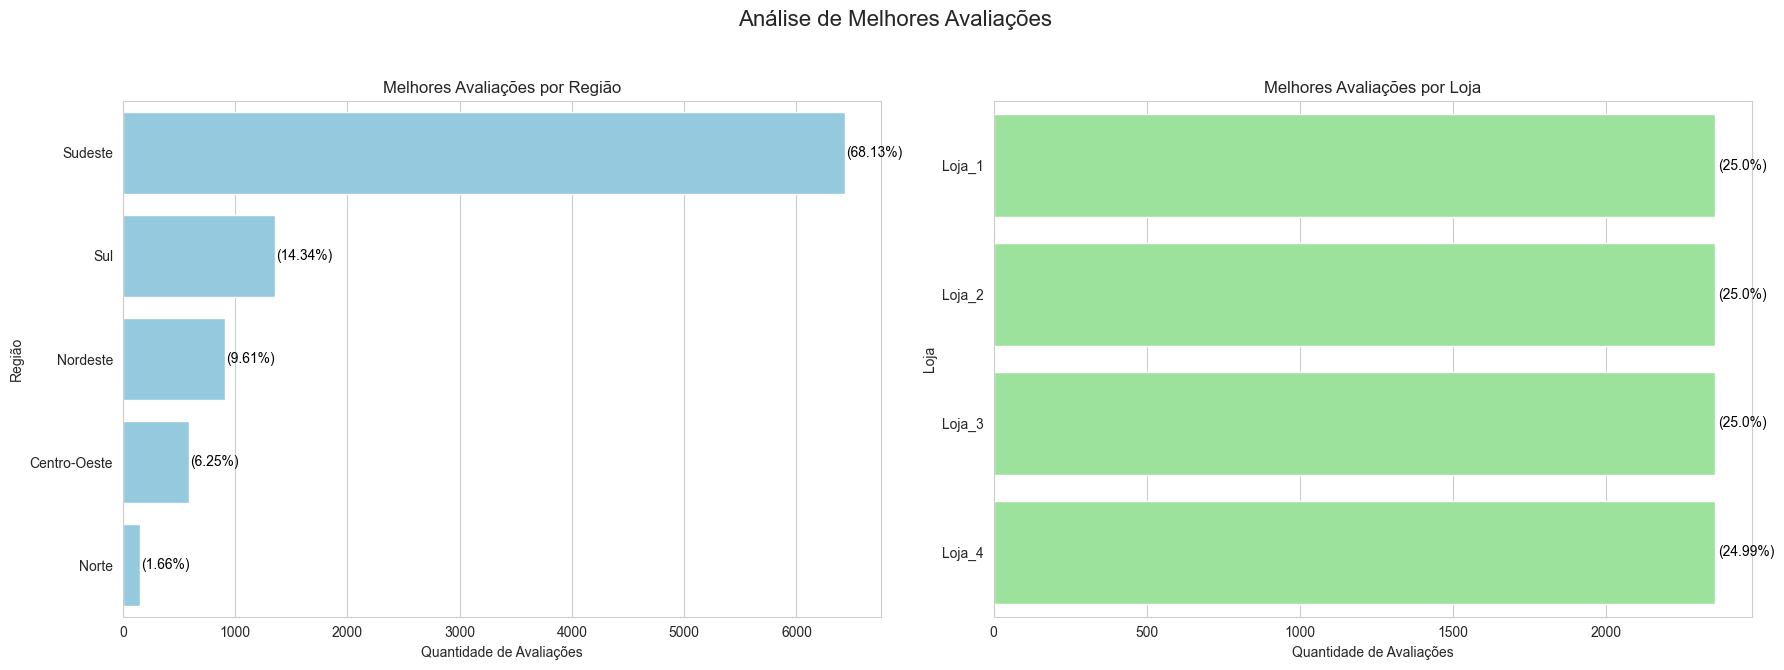

In [ ]:
# Gráfico 1: Melhores Avaliações por Região
melhor_avaliacao_por_regiao = df_geral.groupby('Região')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(5).reset_index()
melhor_avaliacao_por_regiao = melhor_avaliacao_por_regiao.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})
total_avaliacoes = df_geral['Avaliação da compra'].count()
melhor_avaliacao_por_regiao['Percentual'] = (melhor_avaliacao_por_regiao['Qtd Avaliações'] / total_avaliacoes * 100).round(2)

# Gráfico 2: Melhores Avaliações por Loja 
melhor_avaliacao_por_loja = df_geral.groupby('loja')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(5).reset_index()
melhor_avaliacao_por_loja = melhor_avaliacao_por_loja.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})
total_avaliacoes_loja = df_geral['Avaliação da compra'].count() # Usando o mesmo total para o percentual
melhor_avaliacao_por_loja['Percentual'] = (melhor_avaliacao_por_loja['Qtd Avaliações'] / total_avaliacoes_loja * 100).round(2)

# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análise de Melhores Avaliações', fontsize=16)

# Gráfico das Melhores Avaliações por Região (Esquerda)
sns.barplot(data=melhor_avaliacao_por_regiao, y='Região', x='Qtd Avaliações', color='skyblue', ax=axes[0])
axes[0].set_title('Melhores Avaliações por Região')
axes[0].set_xlabel('Quantidade de Avaliações')
axes[0].set_ylabel('Região')
for index, row in melhor_avaliacao_por_regiao.iterrows():
    axes[0].text(row['Qtd Avaliações'] + 10, index, f"({row['Percentual']}%)", color='black', va='center')

# Gráfico das Melhores Avaliações por Loja (Direita)
sns.barplot(data=melhor_avaliacao_por_loja, y='loja', x='Qtd Avaliações', color='lightgreen', ax=axes[1])
axes[1].set_title('Melhores Avaliações por Loja')
axes[1].set_xlabel('Quantidade de Avaliações')
axes[1].set_ylabel('Loja')
for index, row in melhor_avaliacao_por_loja.iterrows():
    axes[1].text(row['Qtd Avaliações'] + 10, index, f"({row['Percentual']}%)", color='black', va='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

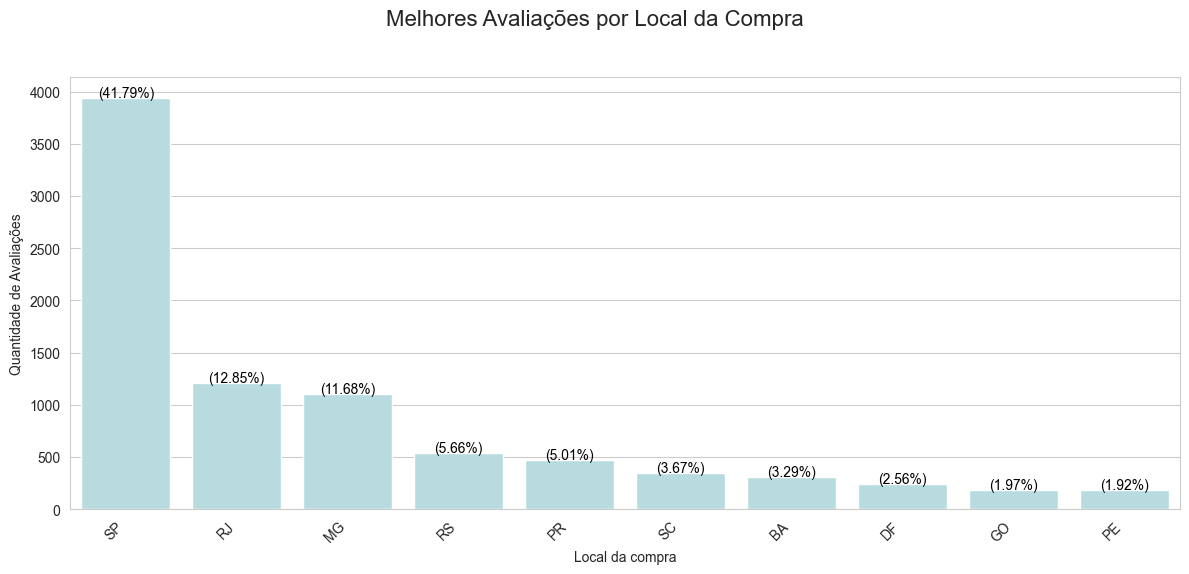

In [ ]:
# Gráfico das Melhores Avaliações por Local de Compra
melhor_avaliacao_por_localidade = df_geral.groupby('Local da compra')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10).reset_index()
melhor_avaliacao_por_localidade = melhor_avaliacao_por_localidade.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})
total_avaliacoes_localidade = df_geral['Avaliação da compra'].count() # Usando o mesmo total para o percentual
melhor_avaliacao_por_localidade['Percentual'] = (melhor_avaliacao_por_localidade['Qtd Avaliações'] / total_avaliacoes_localidade * 100).round(2)

# Criar a figura e os eixos
plt.figure(figsize=(12, 6))
plt.suptitle('Melhores Avaliações por Local da Compra', fontsize=16)

# Gráfico das Melhores Avaliações por Produto
sns.barplot(data=melhor_avaliacao_por_localidade, y='Qtd Avaliações', x='Local da compra', color='powderblue')

for index, row in melhor_avaliacao_por_localidade.iterrows():
    plt.text(row['Local da compra'], row['Qtd Avaliações'] + 10, f"({row['Percentual']}%)", color='black', ha='center')

plt.xlabel('Local da compra')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


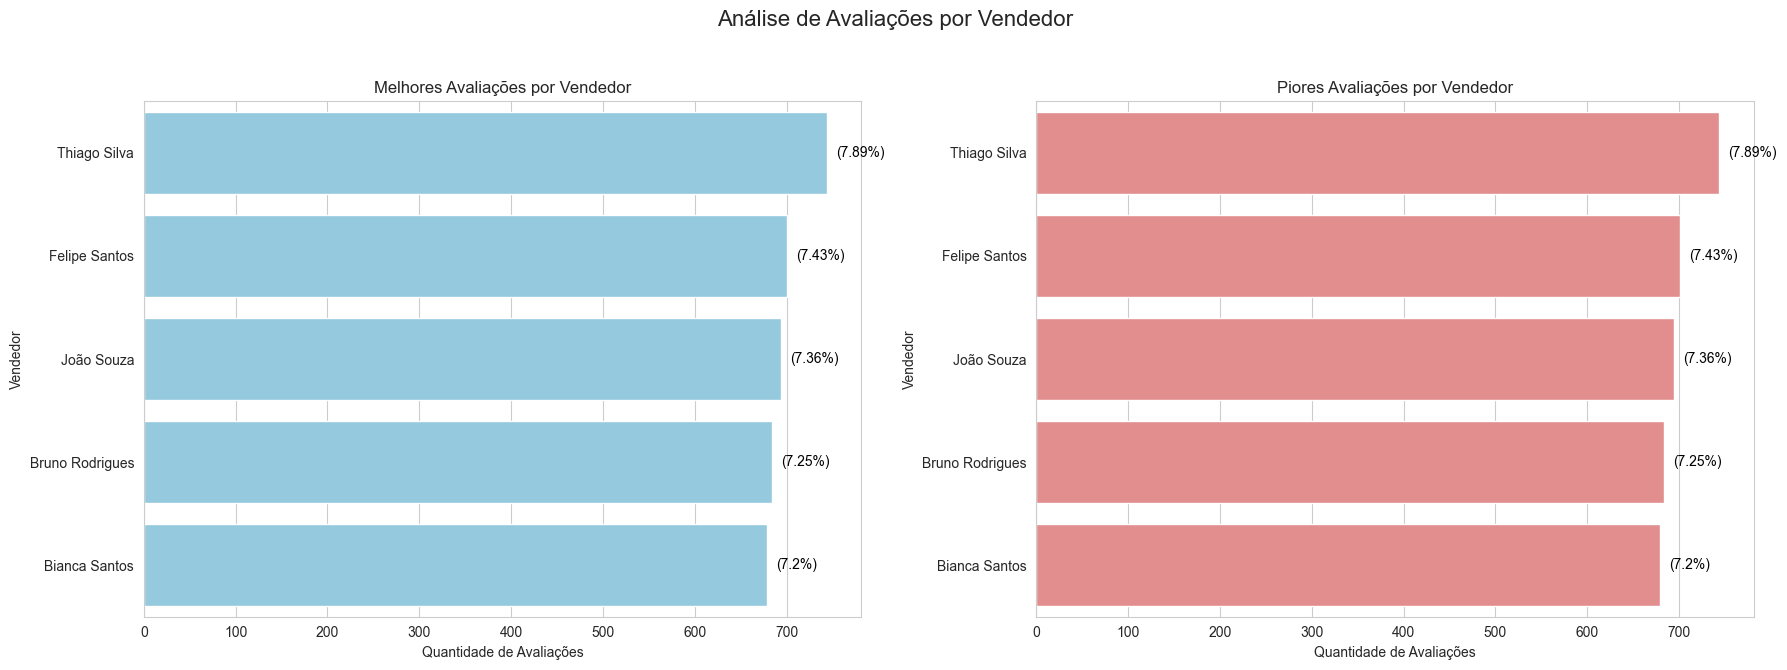

In [ ]:
# Gráfico 3: Melhores Avaliações por Vendedor 
melhor_avaliacao_por_vendedor = df_geral.groupby('Vendedor')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(5).reset_index()
melhor_avaliacao_por_vendedor = melhor_avaliacao_por_vendedor.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})
total_avaliacoes_vendedor = df_geral['Avaliação da compra'].count()
melhor_avaliacao_por_vendedor['Percentual'] = (melhor_avaliacao_por_vendedor['Qtd Avaliações'] / total_avaliacoes_vendedor * 100).round(2)

# Gráfico 4: Piores Avaliações por Vendedor 
pior_avaliacao_por_vendedor = df_geral.groupby('Vendedor')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(5).reset_index()
pior_avaliacao_por_vendedor = pior_avaliacao_por_vendedor.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})
pior_avaliacao_por_vendedor['Percentual'] = (pior_avaliacao_por_vendedor['Qtd Avaliações'] / total_avaliacoes_vendedor * 100).round(2)

# --- Criar os subplots lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análise de Avaliações por Vendedor', fontsize=16)

# --- Gráfico das Melhores Avaliações por Vendedor (Esquerda) ---
sns.barplot(data=melhor_avaliacao_por_vendedor, y='Vendedor', x='Qtd Avaliações', color='skyblue', ax=axes[0])
axes[0].set_title('Melhores Avaliações por Vendedor')
axes[0].set_xlabel('Quantidade de Avaliações')
axes[0].set_ylabel('Vendedor')
for index, row in melhor_avaliacao_por_vendedor.iterrows():
    axes[0].text(row['Qtd Avaliações'] + 10, index, f"({row['Percentual']}%)", color='black', va='center')

# --- Gráfico das Piores Avaliações por Vendedor (Direita) ---
sns.barplot(data=pior_avaliacao_por_vendedor, y='Vendedor', x='Qtd Avaliações', color='lightcoral', ax=axes[1])
axes[1].set_title('Piores Avaliações por Vendedor')
axes[1].set_xlabel('Quantidade de Avaliações')
axes[1].set_ylabel('Vendedor')
for index, row in pior_avaliacao_por_vendedor.iterrows():
    axes[1].text(row['Qtd Avaliações'] + 10, index, f"({row['Percentual']}%)", color='black', va='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

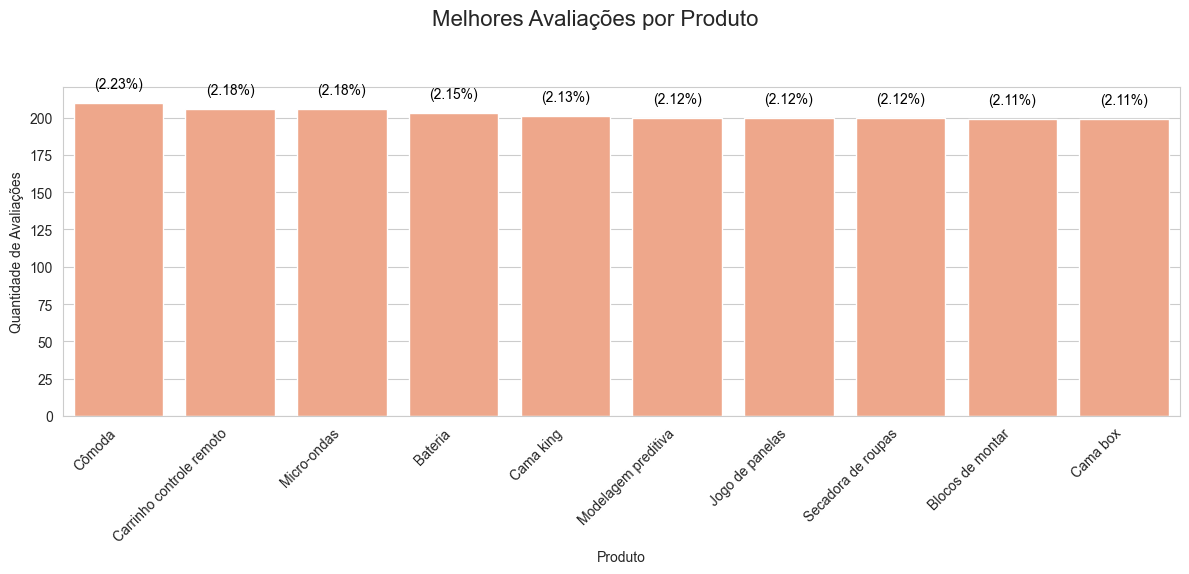

In [ ]:
# Gráfico das Melhores Avaliações por Produto
melhor_avaliacao_por_produto = df_geral.groupby('Produto')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10).reset_index()
melhor_avaliacao_por_produto = melhor_avaliacao_por_produto.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})
total_avaliacoes_produto = df_geral['Avaliação da compra'].count() # Usando o mesmo total para o percentual
melhor_avaliacao_por_produto['Percentual'] = (melhor_avaliacao_por_produto['Qtd Avaliações'] / total_avaliacoes_produto * 100).round(2)

# Criar a figura e os eixos
plt.figure(figsize=(12, 6))
plt.suptitle('Melhores Avaliações por Produto', fontsize=16) # Use plt.suptitle

# Gráfico das Melhores Avaliações por Produto
sns.barplot(data=melhor_avaliacao_por_produto, y='Qtd Avaliações', x='Produto', color='lightsalmon')

for index, row in melhor_avaliacao_por_produto.iterrows():
    plt.text(row['Produto'], row['Qtd Avaliações'] + 10, f"({row['Percentual']}%)", color='black', ha='center') # Use plt.text e ajuste as coordenadas

plt.xlabel('Produto')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo x para melhor leitura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 4. Produtos Mais e Menos Vendidos

### Análise de Produtos Mais Vendidos - Por Loja e Geral

In [ ]:
# 1 Top 10 produtos mais vendidos
top10_produtos = df_geral['Produto'].value_counts().head(10).index

# 2 Filtrar apenas os dados desses produtos
df_top10 = df_geral[df_geral['Produto'].isin(top10_produtos)]

# 3 Agrupar por Produto e Loja (para ver onde vende mais)
produto_loja = df_top10.groupby(['Produto', 'loja']).size().reset_index(name='quantidade_vendida')

# 4 Pivotar a tabela para facilitar a visualização
tabela_final = produto_loja.pivot(index='Produto', columns='loja', values='quantidade_vendida').fillna(0).astype(int)

# 5 Adicionar total por produto
tabela_final['TOTAL'] = tabela_final.sum(axis=1)

# 6 Reordenar pela coluna TOTAL (do maior pro menor)
tabela_final = tabela_final.sort_values(by='TOTAL', ascending=False)

# Exibir a tabela final
tabela_final

loja,Loja_1,Loja_2,Loja_3,Loja_4,TOTAL
Produto,,,,,
Cômoda,56,44,55,55,210
Carrinho controle remoto,52,47,52,55,206
Micro-ondas,60,62,36,48,206
Bateria,53,61,41,48,203
Cama king,44,45,56,56,201
Jogo de panelas,43,52,55,50,200
Modelagem preditiva,51,46,53,50,200
Secadora de roupas,58,57,45,40,200
Blocos de montar,56,54,35,54,199


### Análise de Produtos Menos Vendidos - Por Loja e Geral

In [ ]:
# 1 Top 10 produtos menos vendidos
top10_produtos = df_geral['Produto'].value_counts().tail(10).index

# 2 Filtrar apenas os dados desses produtos
df_top10 = df_geral[df_geral['Produto'].isin(top10_produtos)]

# 3 Agrupar por Produto e Loja (para ver onde vende mais)
produto_loja = df_top10.groupby(['Produto', 'loja']).size().reset_index(name='quantidade_vendida')

# 4 Pivotar a tabela para facilitar a visualização
tabela_final = produto_loja.pivot(index='Produto', columns='loja', values='quantidade_vendida').fillna(0).astype(int)

# 5 Adicionar total por produto
tabela_final['TOTAL'] = tabela_final.sum(axis=1)

# 6 Reordenar pela coluna TOTAL (do maior pro menor)
tabela_final = tabela_final.sort_values(by='TOTAL', ascending=True)

# Exibir a tabela final
tabela_final


loja,Loja_1,Loja_2,Loja_3,Loja_4,TOTAL
Produto,,,,,
Celular ABXY,33,41,44,39,157
Headset,33,44,39,42,158
Mochila,39,45,36,43,163
Guitarra,47,47,38,33,165
Ciência de dados com python,39,43,46,38,166
Assistente virtual,40,38,39,50,167
Poltrona,41,35,47,45,168
Jogo de copos,41,46,36,46,169
Panela de pressão,35,44,47,46,172


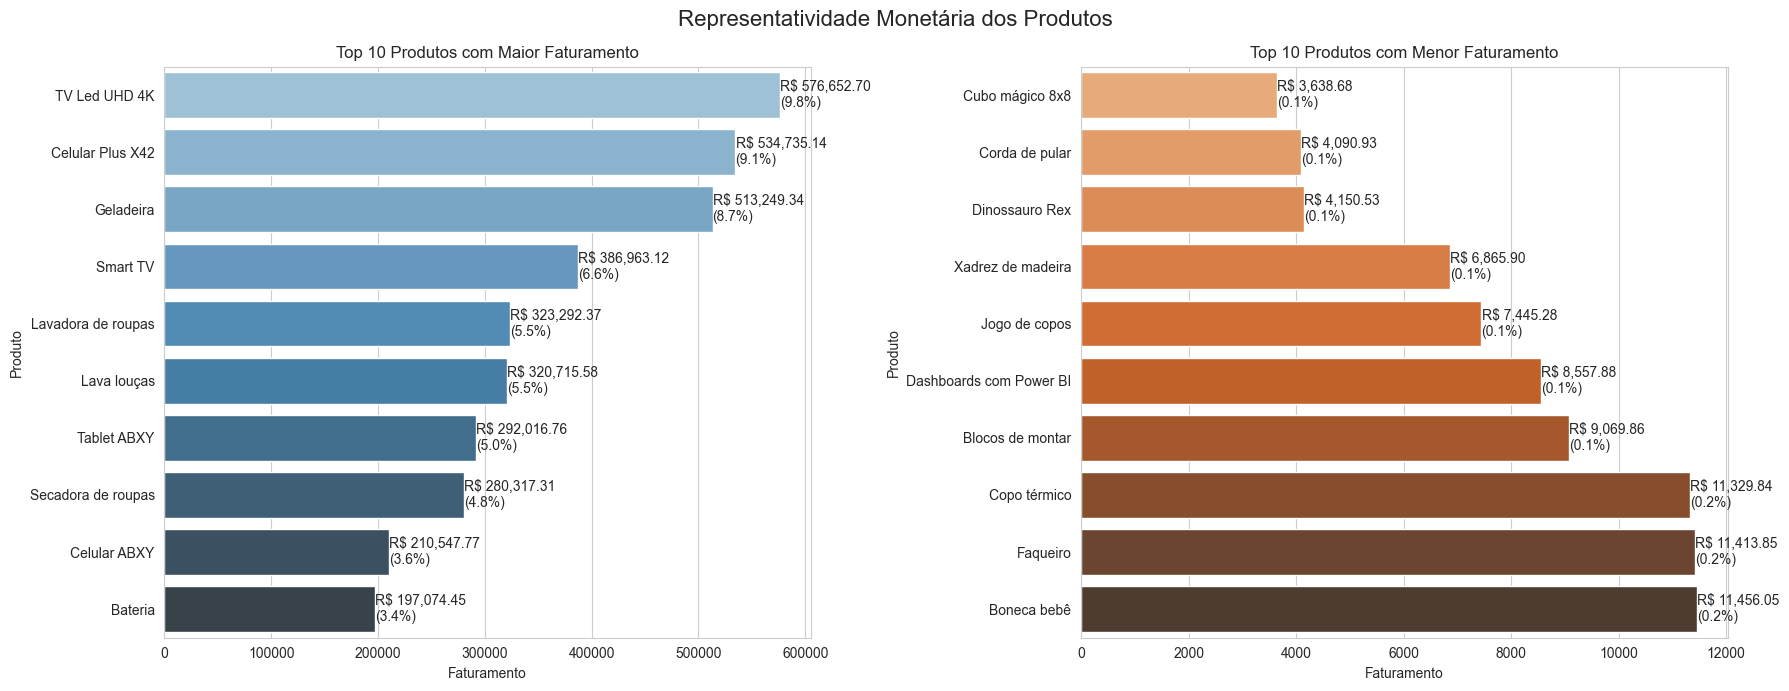

In [ ]:
# 1. Agrupando faturamento total por produto
faturamento_por_produto = df_geral.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

# 2. Top 10 em faturamento (mais e menos)
top_mais_valor = faturamento_por_produto.head(10)
top_menos_valor = faturamento_por_produto.sort_values(ascending=True).head(10)

# 3. Cálculo do total geral para percentual
faturamento_total = faturamento_por_produto.sum()

top_mais_percent = (top_mais_valor / faturamento_total * 100).round(2)
top_menos_percent = (top_menos_valor / faturamento_total * 100).round(2)

# 4. DataFrames para plotagem
df_mais_valor = pd.DataFrame({
    'Produto': top_mais_valor.index,
    'Faturamento': top_mais_valor.values,
    'Percentual': top_mais_percent.values
})

df_menos_valor = pd.DataFrame({
    'Produto': top_menos_valor.index,
    'Faturamento': top_menos_valor.values,
    'Percentual': top_menos_percent.values
})

# 5. Estilo dos gráficos, mantendo lado a lado
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# 6. Gráfico de Produtos com Mais Faturamento
sns.barplot(data=df_mais_valor, y='Produto', x='Faturamento', hue='Produto', palette='Blues_d', ax=axs[0])
axs[0].set_title('Top 10 Produtos com Maior Faturamento')
for i, row in df_mais_valor.iterrows():
    axs[0].text(row['Faturamento'] + 50, i, f"R$ {row['Faturamento']:,.2f}\n({row['Percentual']:.1f}%)", va='center')

# 7. Gráfico de Produtos com Menos Faturamento
sns.barplot(data=df_menos_valor, y='Produto', x='Faturamento', hue='Produto', palette='Oranges_d', ax=axs[1], legend=False)
axs[1].set_title('Top 10 Produtos com Menor Faturamento')
for i, row in df_menos_valor.iterrows():
    axs[1].text(row['Faturamento'] + 2, i, f"R$ {row['Faturamento']:,.2f}\n({row['Percentual']:.1f}%)", va='center')

plt.suptitle('Representatividade Monetária dos Produtos', fontsize=16)
plt.tight_layout()
plt.show()


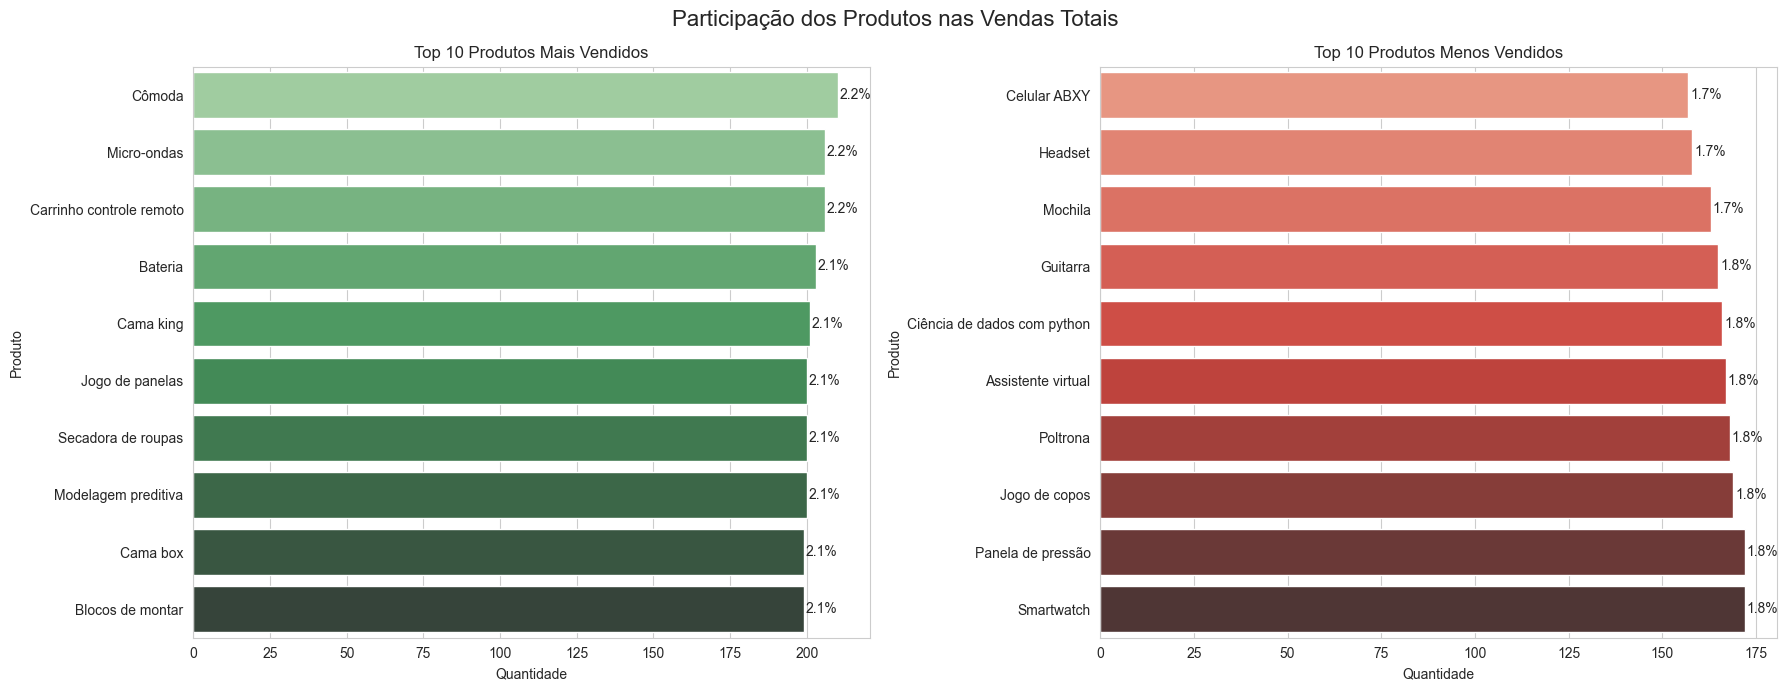

In [ ]:
# 1. Contagem da coluna de produtos
contagem_produtos = df_geral['Produto'].value_counts()

# 2. Top 10 Mais Vendidos e Menos Vendidos
mais_vendidos = contagem_produtos.head(10)
menos_vendidos = contagem_produtos.sort_values(ascending=True).head(10)

# 3. Cálculo do percentual
total_vendas = contagem_produtos.sum()

mais_vendidos_percentual = (mais_vendidos / total_vendas * 100).round(2)
menos_vendidos_percentual = (menos_vendidos / total_vendas * 100).round(2)

# 4. Conversão para DataFrame para facilitar plotagem
df_mais = pd.DataFrame({
    'Produto': mais_vendidos.index,
    'Quantidade': mais_vendidos.values,
    'Percentual': mais_vendidos_percentual.values
})

df_menos = pd.DataFrame({
    'Produto': menos_vendidos.index,
    'Quantidade': menos_vendidos.values,
    'Percentual': menos_vendidos_percentual.values
})

# 5. Estilo dos gráficos, mantendo lado a lado
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# 6. Gráfico de Produtos Mais Vendidos
sns.barplot(data=df_mais, y='Produto', x='Quantidade', hue='Produto', palette='Greens_d', ax=axs[0])
axs[0].set_title('Top 10 Produtos Mais Vendidos')
for i, row in df_mais.iterrows():
    axs[0].text(row['Quantidade'] + 0.5, i, f"{row['Percentual']:.1f}%", va='center')

# 7. Gráfico de Produtos Menos Vendidos
sns.barplot(data=df_menos, y='Produto', x='Quantidade', hue='Produto', palette='Reds_d', ax=axs[1], legend=False)
axs[1].set_title('Top 10 Produtos Menos Vendidos')
for i, row in df_menos.iterrows():
    axs[1].text(row['Quantidade'] + 0.5, i, f"{row['Percentual']:.1f}%", va='center')

plt.suptitle('Participação dos Produtos nas Vendas Totais', fontsize=16)
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja

In [ ]:
# Calcular o custo médio de frete por loja
frete_medio_por_loja = df_geral.groupby('loja')['Frete'].mean().sort_values(ascending=False).reset_index(0)

# Exibir a tabela com os resultados
frete_medio_por_loja.round(2)

,loja,Frete
0,Loja_1,34.69
1,Loja_2,33.62
2,Loja_3,33.07
3,Loja_4,31.28


In [ ]:
# Calcular o custo médio de frete por localidade
frete_medio_por_localidade = df_geral.groupby(['Local da compra', 'Região'])['Frete'].mean().sort_values(ascending=False).reset_index(0)

# Exibir a tabela com os resultados
frete_medio_por_localidade.round(2)

,Local da compra,Frete
Região,,
Norte,RR,113.67
Norte,AC,49.36
Norte,RO,46.35
Nordeste,RN,40.09
Centro-Oeste,GO,38.13
Nordeste,PI,36.95
Sul,RS,36.58
Nordeste,PE,35.72
Nordeste,MA,35.13


In [ ]:
# Calcular o custo total de frete por localidade e região
frete_total_por_localidade_regiao = df_geral.groupby(['Local da compra', 'Região', 'loja', 'Produto'])['Frete'].sum().reset_index()

# Ordenar pela coluna 'Região'
frete_total_por_localidade_regiao = frete_total_por_localidade_regiao.sort_values(by='Produto', ascending=True)

# Exibir a tabela com os resultados
frete_total_por_localidade_regiao.head(10).round(2)

,Local da compra,Região,loja,Produto,Frete
1145,PA,Norte,Loja_3,Assistente virtual,17.80
925,MG,Sudeste,Loja_4,Assistente virtual,94.15
1361,PI,Nordeste,Loja_4,Assistente virtual,43.20
1655,RJ,Sudeste,Loja_3,Assistente virtual,34.74
1375,PR,Sul,Loja_1,Assistente virtual,27.55
37,AL,Nordeste,Loja_4,Assistente virtual,12.67
1912,RS,Sul,Loja_3,Assistente virtual,27.54
446,DF,Centro-Oeste,Loja_4,Assistente virtual,16.28
874,MG,Sudeste,Loja_3,Assistente virtual,77.15
1422,PR,Sul,Loja_2,Assistente virtual,31.40


In [ ]:
# Custo médio de frete por loja
frete_medio = df_geral.groupby('loja')['Frete'].mean()

# Avaliação média por loja
avaliacao_media = df_geral.groupby('loja')['Avaliação da compra'].mean()

# Juntando os dados em um DataFrame
comparativo = pd.DataFrame({
    'Frete Médio': frete_medio,
    'Avaliação Média': avaliacao_media
}).sort_values('Frete Médio', ascending=False)

comparativo.round(2)

,Frete Médio,Avaliação Média
loja,,
Loja_1,34.69,3.98
Loja_2,33.62,4.04
Loja_3,33.07,4.05
Loja_4,31.28,4.00


In [ ]:
# Agrupar por Região e somar os fretes
frete_por_regiao = df_geral.groupby('Região')['Frete'].sum().reset_index()

# Ordenar do maior para o menor
frete_por_regiao = frete_por_regiao.sort_values(by='Frete', ascending=False)

# Exibir a tabela
frete_por_regiao.round(2)


,Região,Frete
3,Sudeste,212652.98
4,Sul,46210.56
1,Nordeste,28978.05
0,Centro-Oeste,19775.35
2,Norte,5313.72


In [58]:
# Agrupar por Produto, Loja e Local da Compra
frete_por_produto_loja = df_geral.groupby(['Produto', 'loja', 'Local da compra', 'Preço', 'Mês_Nome', 'Dia'])['Frete'].sum().reset_index()

# Ordenar para pegar os maiores e menores fretes
top10_frete_maior = frete_por_produto_loja.sort_values(by='Frete', ascending=False).head(20)
top10_frete_menor = frete_por_produto_loja.sort_values(by='Frete', ascending=True).head(10)


In [59]:
# Exibir os resultados
print("Top 10 Produtos com Maior Custo de Frete:")
top10_frete_maior.round(2)

Top 10 Produtos com Maior Custo de Frete:


,Produto,loja,Local da compra,Preço,Mês_Nome,Dia,Frete
8779,TV Led UHD 4K,Loja_2,RJ,3927.96,May,21,216.71
8722,TV Led UHD 4K,Loja_1,PR,3966.67,December,28,214.38
8760,TV Led UHD 4K,Loja_1,SP,3969.38,August,23,211.64
8827,TV Led UHD 4K,Loja_3,RJ,3957.62,January,14,211.26
8759,TV Led UHD 4K,Loja_1,SP,3954.82,June,30,208.17
8772,TV Led UHD 4K,Loja_2,MG,3937.85,May,7,207.26
8771,TV Led UHD 4K,Loja_2,MG,3876.65,September,26,206.95
8770,TV Led UHD 4K,Loja_2,MG,3695.19,January,3,206.34
8887,TV Led UHD 4K,Loja_4,SP,3869.56,August,29,206.33
8804,TV Led UHD 4K,Loja_2,SP,3852.22,January,24,206.06


In [84]:
top10_frete_menor

,Produto,loja,Local da compra,Preço,Mês_Nome,Dia,Frete
5410,Jogo de copos,Loja_1,RS,37.49,October,4,0.0
614,Blocos de montar,Loja_1,SP,53.58,January,2,0.0
615,Blocos de montar,Loja_1,SP,53.82,December,22,0.0
3709,Dinossauro Rex,Loja_4,MG,29.10,February,26,0.0
1235,Boneca bebê,Loja_3,ES,57.86,April,20,0.0
1234,Boneca bebê,Loja_3,CE,51.46,August,1,0.0
5474,Jogo de copos,Loja_2,SP,54.41,July,21,0.0
621,Blocos de montar,Loja_1,TO,41.25,March,5,0.0
5475,Jogo de copos,Loja_2,SP,54.45,November,26,0.0
623,Blocos de montar,Loja_2,BA,58.31,December,15,0.0


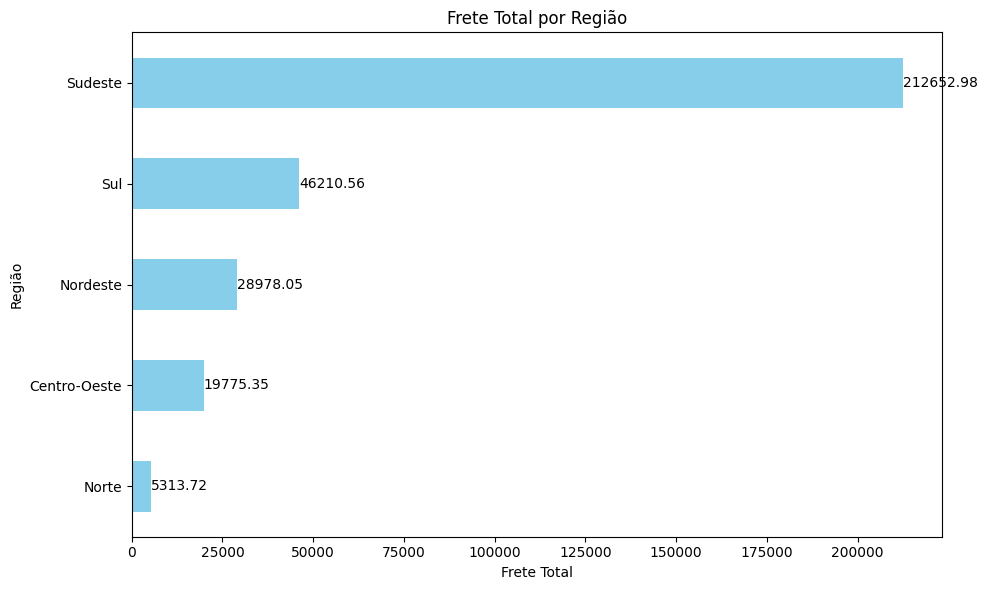

In [32]:
# Agrupar por Local da compra e calcular o frete total
frete_por_regiao = df_geral.groupby('Região')['Frete'].sum().sort_values(ascending=False)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = frete_por_regiao.plot(kind='barh', color='skyblue')
plt.xlabel('Frete Total')
plt.ylabel('Região')
plt.title('Frete Total por Região')
plt.gca().invert_yaxis() # Para mostrar a região com maior frete no topo

# Adicionar as anotações com os valores
for bar in bars.patches:
    width = bar.get_width()
    x_position = width + 5 # Ajuste a posição horizontal do texto
    y_position = bar.get_y() + bar.get_height() / 2
    plt.text(x_position, y_position, f'{width:.2f}', va='center') # Formata o valor com 2 casas decimais

plt.tight_layout()
plt.show()

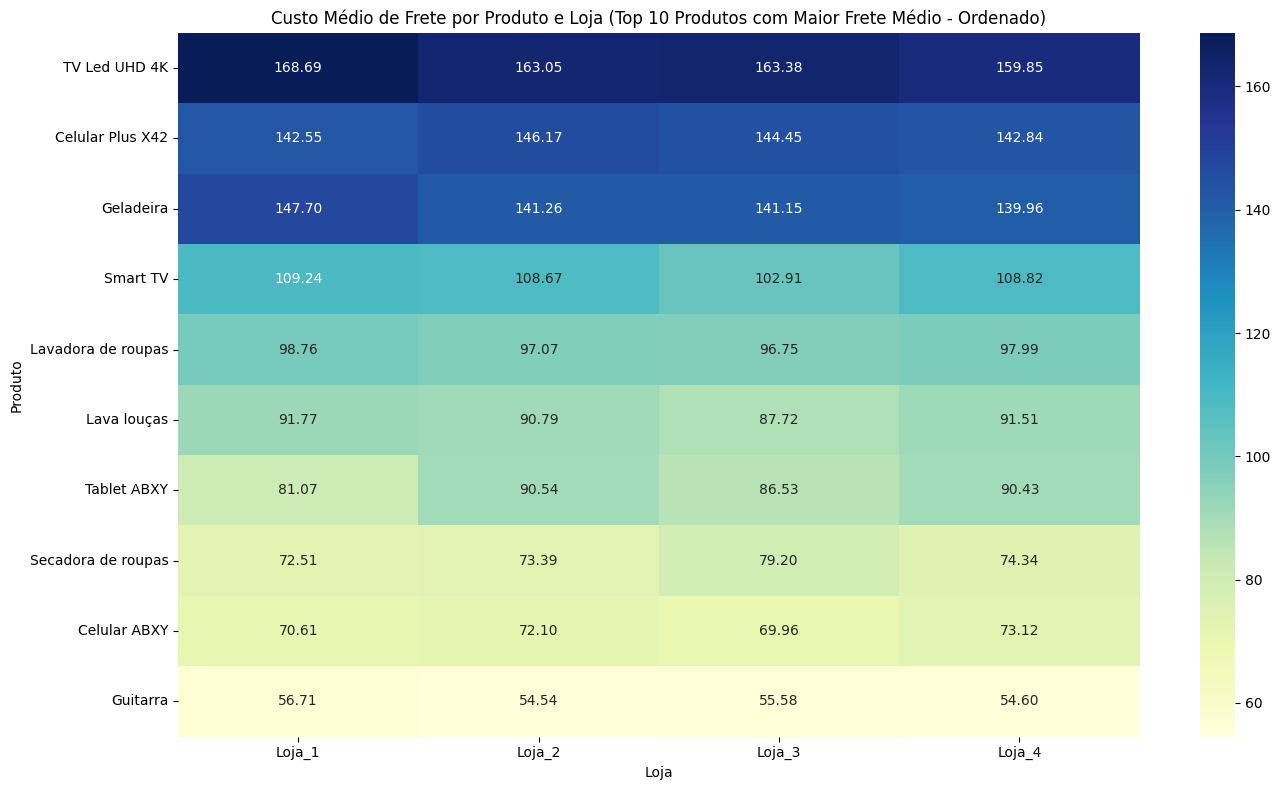

In [53]:
# 1. Calcular o custo médio do frete por Produto
frete_medio_por_produto = df_geral.groupby('Produto')['Frete'].mean().sort_values(ascending=False)

# 2. Selecionar os 10 produtos com o maior frete médio
top_10_frete_medio_produtos = frete_medio_por_produto.head(10).index.tolist()

# 3. Filtrar o DataFrame para incluir apenas os 10 produtos com maior frete médio
df_top_10_frete = df_geral[df_geral['Produto'].isin(top_10_frete_medio_produtos)]

# 4. Calcular o custo médio do frete por Produto e Loja PARA OS TOP 10 PRODUTOS
frete_medio_produto_loja_top_10 = df_top_10_frete.groupby(['Produto', 'loja'])['Frete'].mean().unstack()

# 5. Reordenar as linhas do DataFrame com base no frete médio geral (para o mapa de calor)
frete_medio_produto_loja_ordenado = frete_medio_produto_loja_top_10.loc[top_10_frete_medio_produtos]

# 6. Criar o mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(frete_medio_produto_loja_ordenado, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Custo Médio de Frete por Produto e Loja (Top 10 Produtos com Maior Frete Médio - Ordenado)')
plt.xlabel('Loja')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

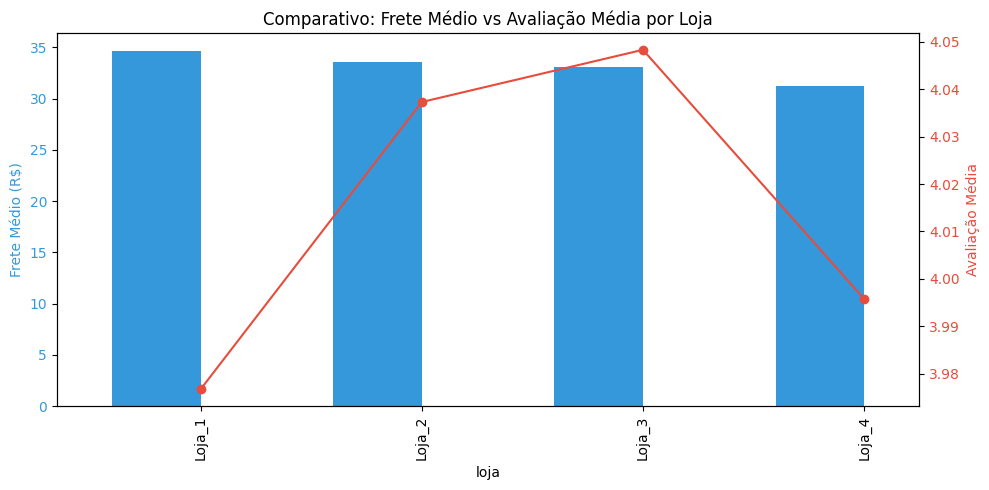

In [ ]:
# Gráfico com 2 eixos (frete e avaliação)
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras para o frete
comparativo['Frete Médio'].plot(kind='bar', color='#3498db', ax=ax1, position=1, width=0.4)
ax1.set_ylabel('Frete Médio (R$)', color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')

# Linha para avaliação
ax2 = ax1.twinx()
comparativo['Avaliação Média'].plot(kind='line', color='#e74c3c', marker='o', ax=ax2)
ax2.set_ylabel('Avaliação Média', color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title('Comparativo: Frete Médio vs Avaliação Média por Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

# 📊 Relatório Final

### 📈 Projeto Alura Store

**Objetivo**: Apoiar o Sr. João no entendimento de qual loja seria a mais indicada para ser vendida, mediante as análises exploratórias obtidas no conjunto de dados fornecido pela equipe da Alura Store. 

Observamos através dos seguintes critérios: 

 - **Faturamento total**
 - **Categorias de produtos mais e menos vendidas**
 - **Média das avaliações dos clientes**
 - **Produtos mais e menos vendidos**
 - **Frete médio**


